In [1]:
import pandas
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [3]:
plt.rcParams["figure.max_open_warning"] = 100

In [4]:
virii=pandas.read_csv('virii_details.csv', sep="\t", header=None, 
                      names=["accession","description"],
                      index_col=["accession"])
virii.head()

,description
accession,
AB513134.1,"Human T-lymphotropic virus 1 proviral DNA, com..."
AB618031.1,"Herpes simplex virus (type 1 /strain RH2) DNA,..."
AF037218.1,"Human herpesvirus 7 strain RK, complete genome"
AF148805.2,"Human herpesvirus 8 strain GK18, complete genome"
AP015015.1,"Human herpesvirus 4 DNA, complete genome, stra..."


In [5]:
conn = sqlite3.connect("viral_mapped_unmapped.2500.1.sqlite3")
df = pandas.read_sql_query("SELECT * FROM subjects", conn)
df.head()

,subject,unmapped,mapped,total,AB513134_1,AB513134_1_unmapped,AB513134_1_total,uncommon_AB513134_1,uncommon_AB513134_1_unmapped,uncommon_AB513134_1_total,...,X83413_2_total,uncommon_X83413_2,uncommon_X83413_2_unmapped,uncommon_X83413_2_total,Z86099_2,Z86099_2_unmapped,Z86099_2_total,uncommon_Z86099_2,uncommon_Z86099_2_unmapped,uncommon_Z86099_2_total
0,HG00096,2083467,145063589,147147056,0,0.0,0.0,0,0.0,0.0,...,0.000033,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0
1,HG00097,1158537,298693620,299852157,0,0.0,0.0,0,0.0,0.0,...,0.000020,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0
2,HG00099,1147814,247709161,248856975,0,0.0,0.0,0,0.0,0.0,...,0.000032,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0
3,HG00100,13376337,408106230,421482567,0,0.0,0.0,0,0.0,0.0,...,0.000166,0,0.0,0.0,13,9.718655e-07,3.084351e-08,0,0.0,0.0
4,HG00101,1058895,217906779,218965674,0,0.0,0.0,0,0.0,0.0,...,0.000047,0,0.0,0.0,0,0.000000e+00,0.000000e+00,0,0.0,0.0


In [6]:
len(df)

2535

/Users/jakewendt/Library/Python/3.6/lib/python/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 100 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


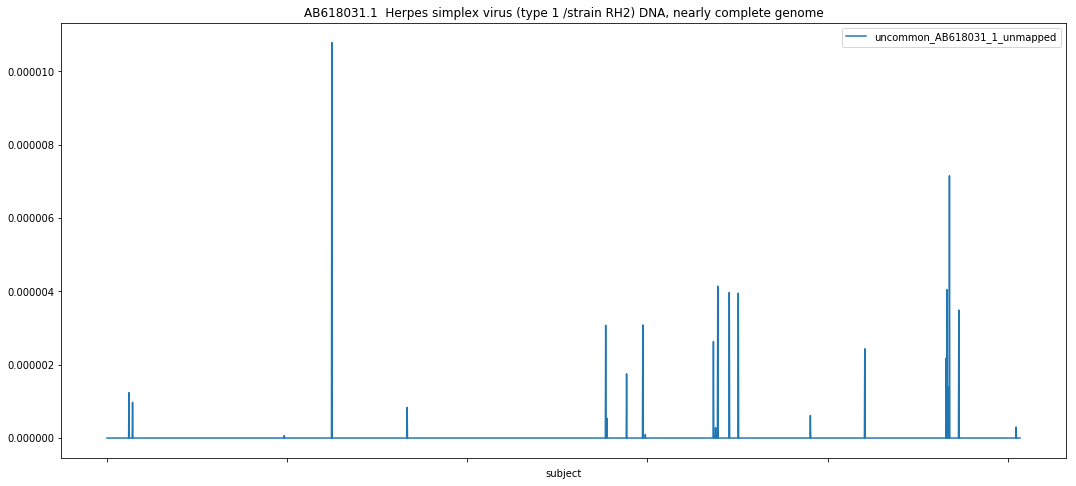

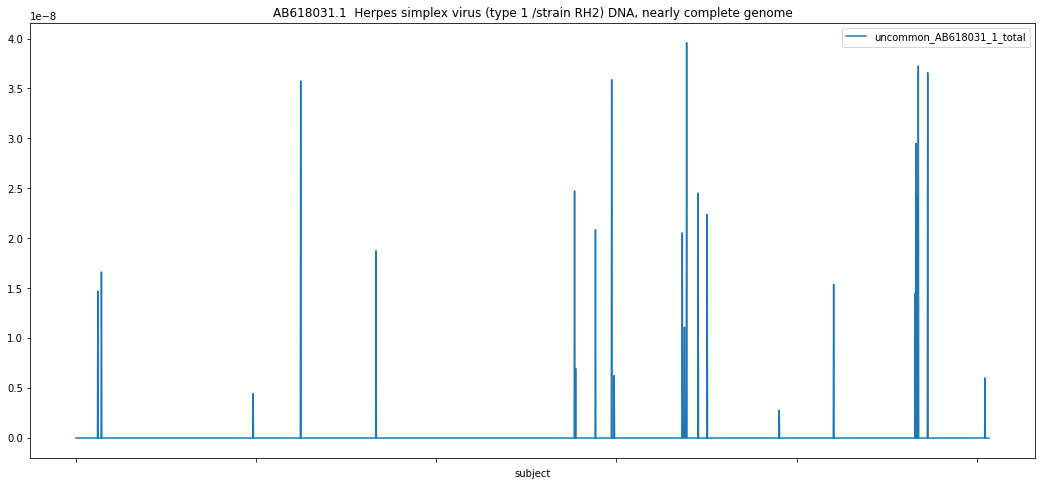

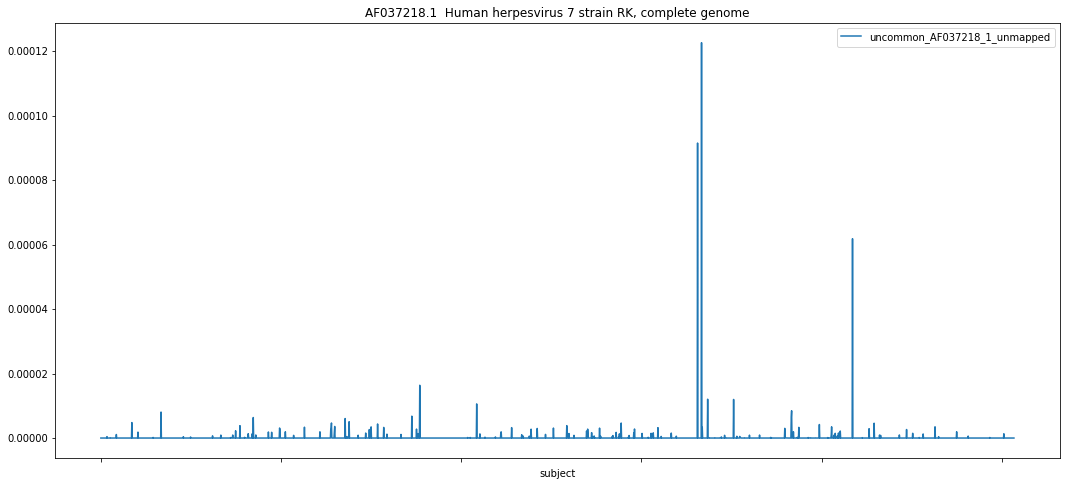

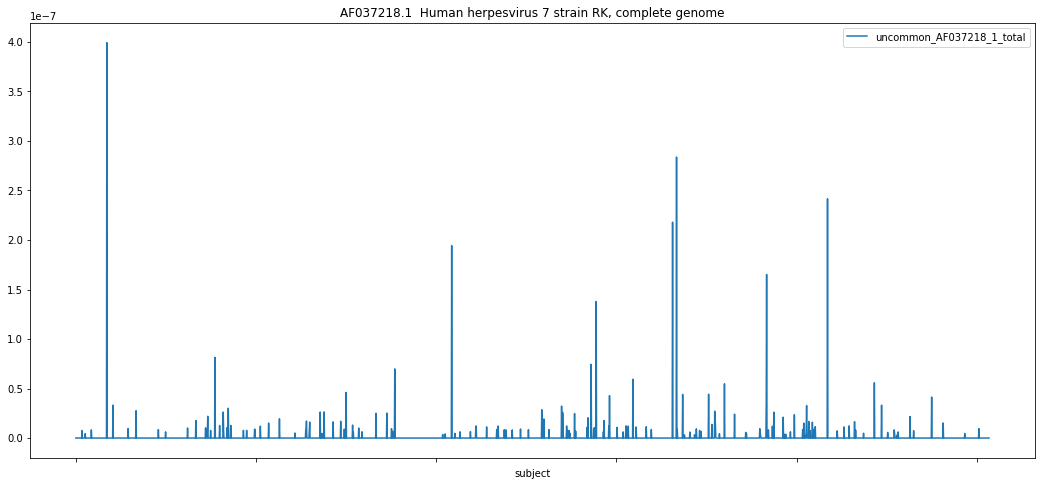

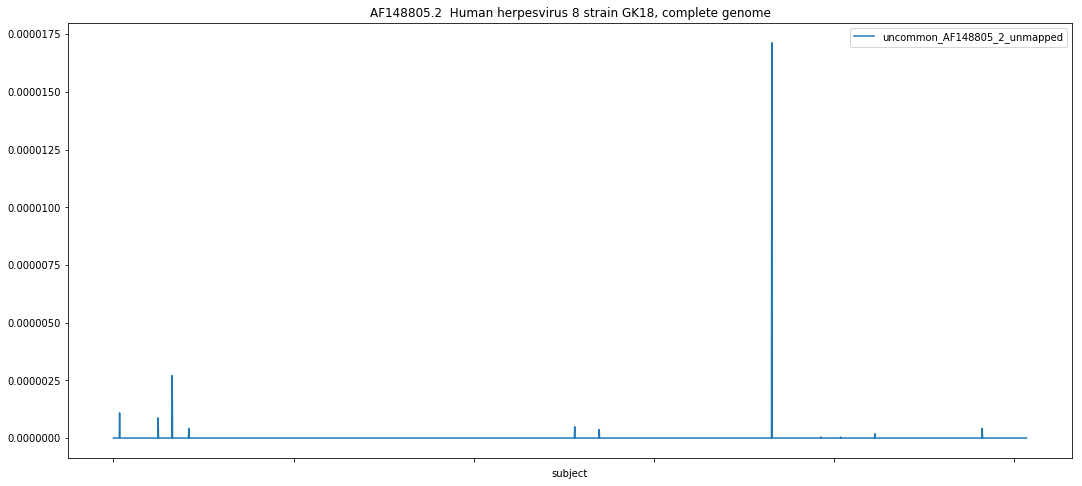

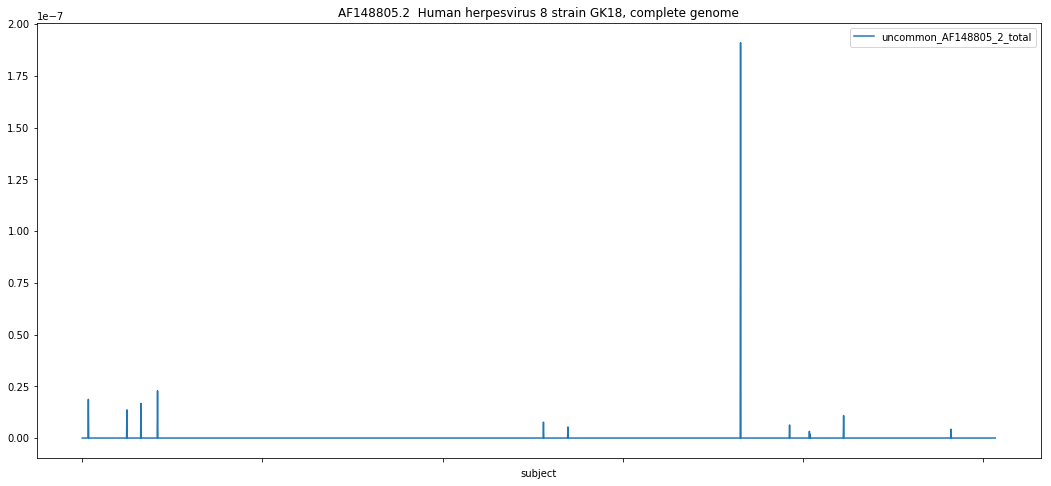

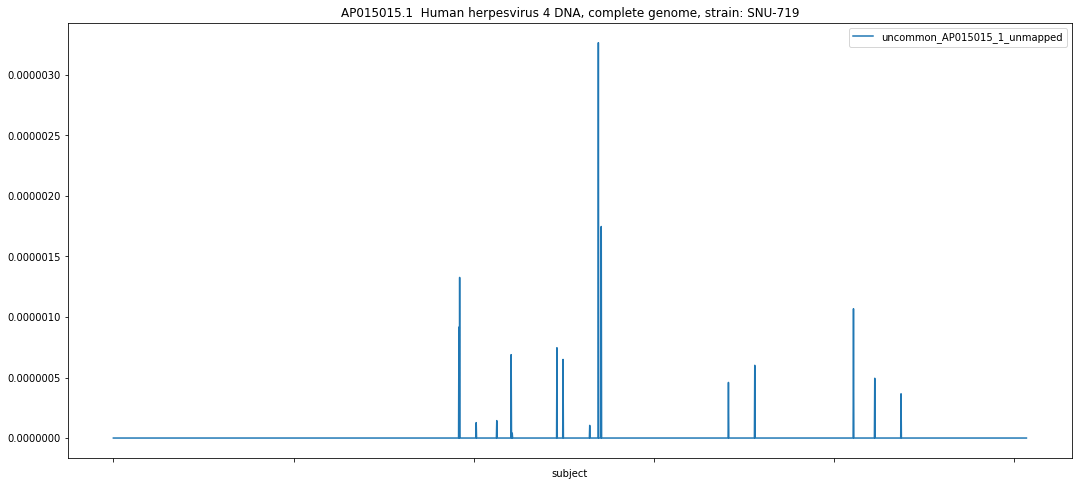

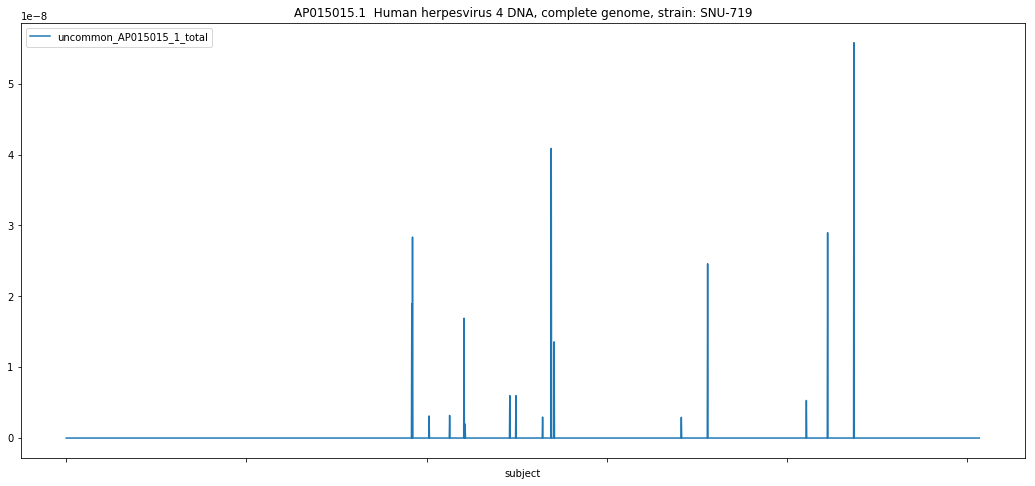

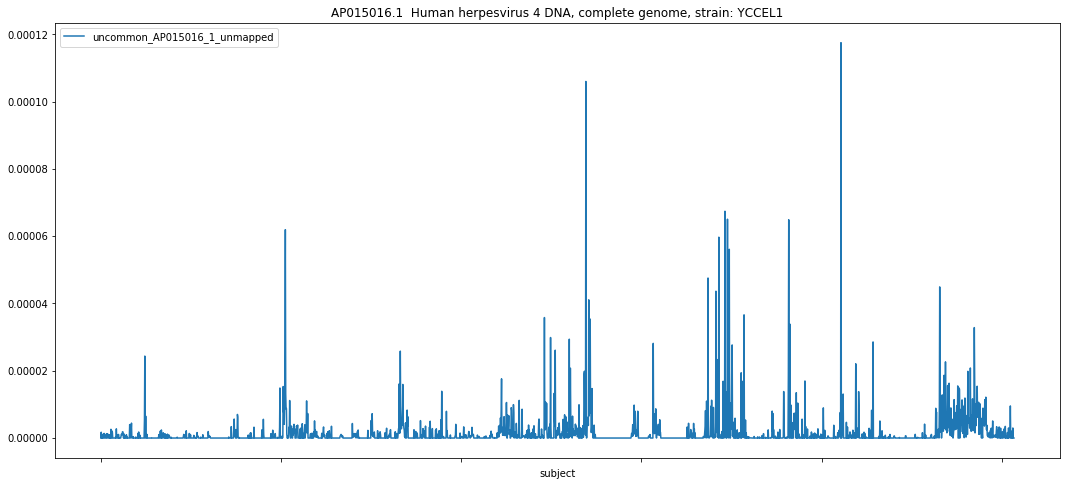

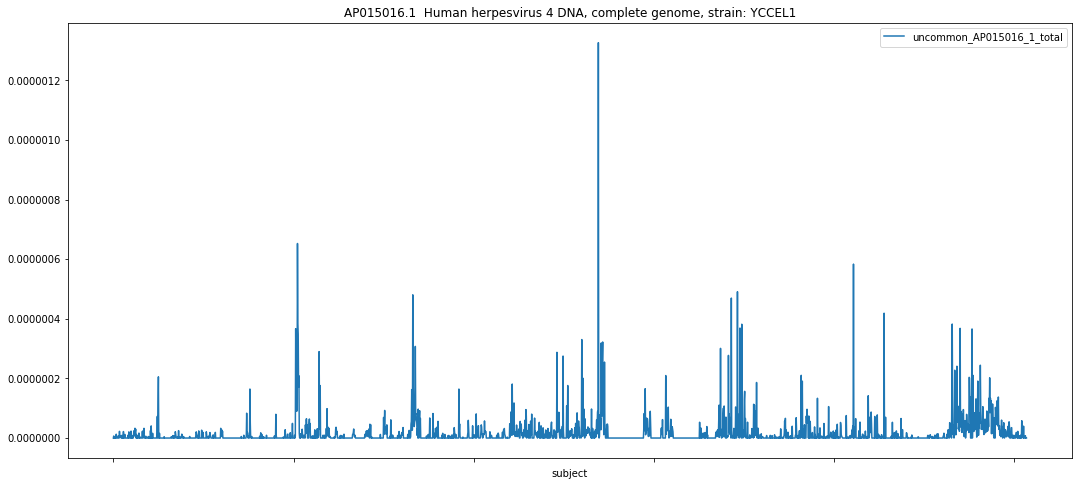

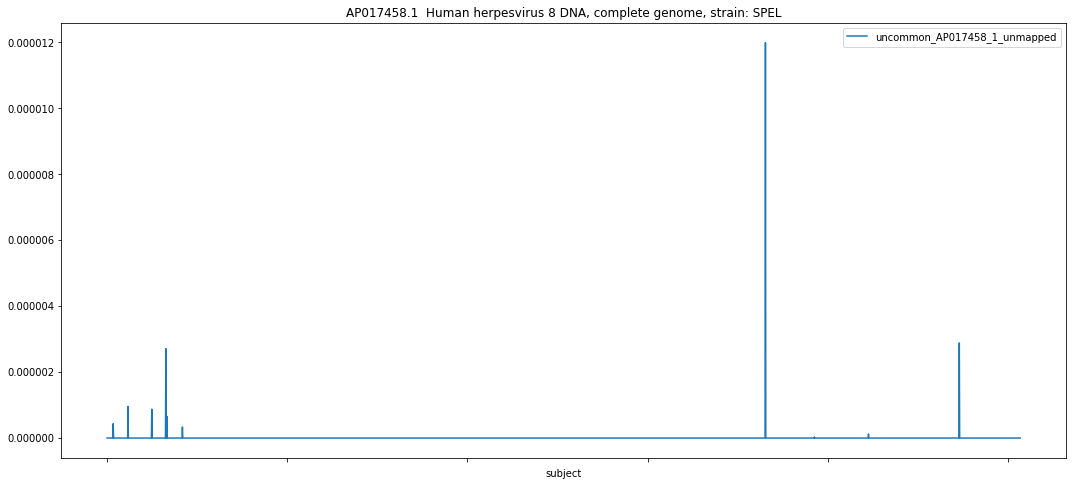

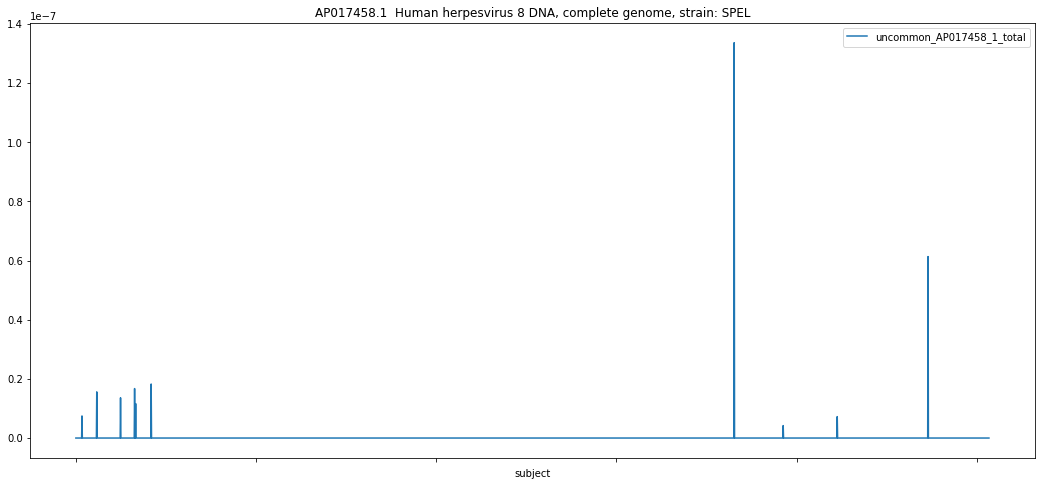

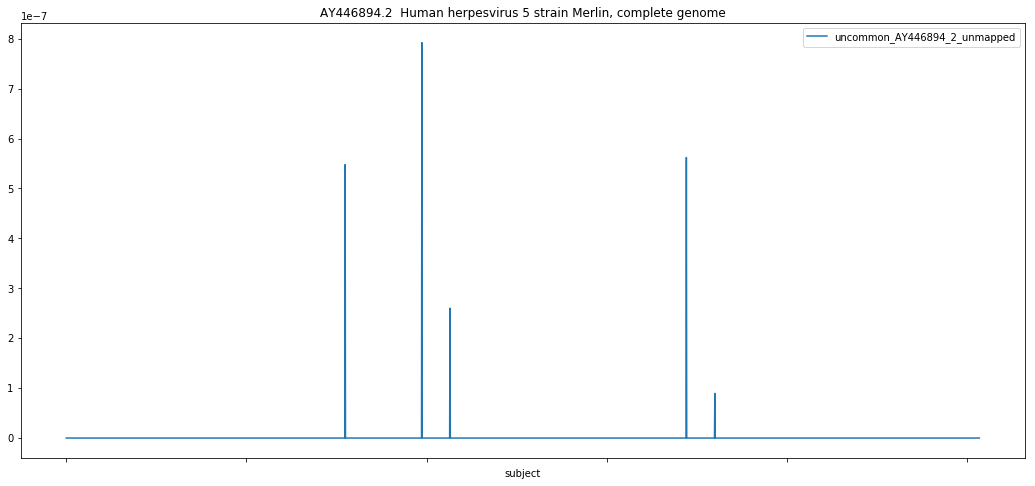

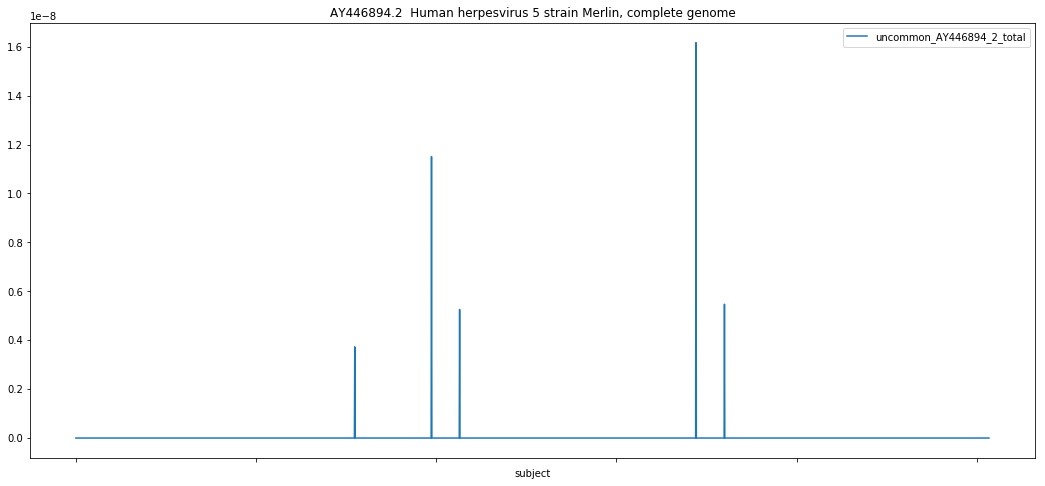

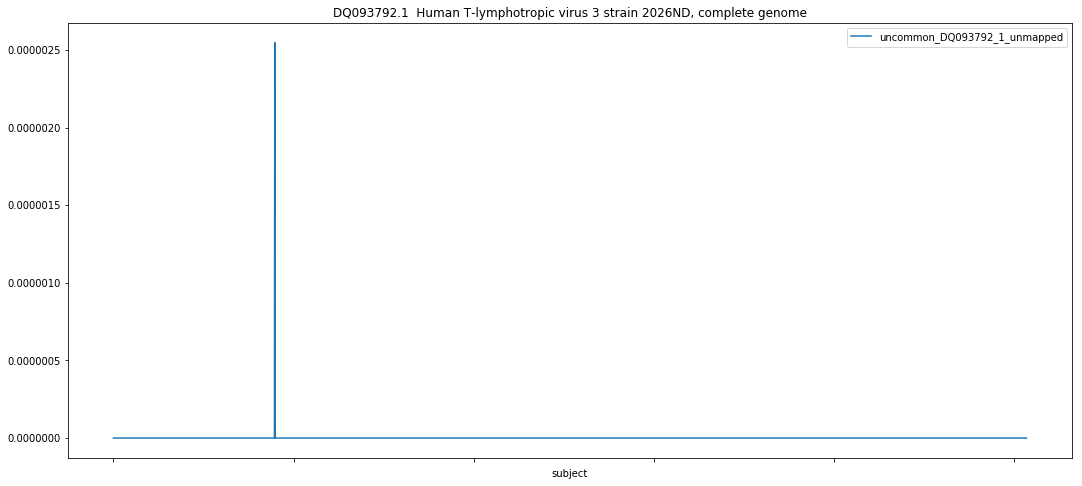

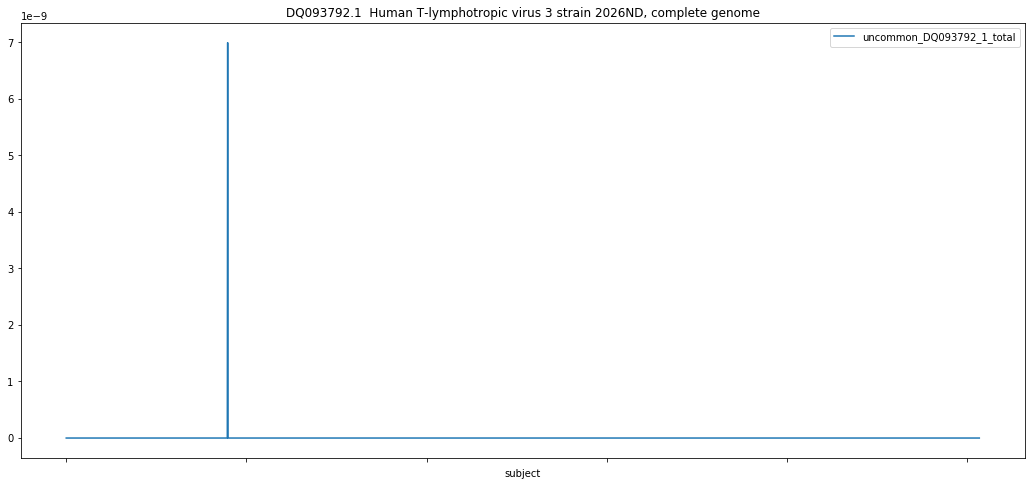

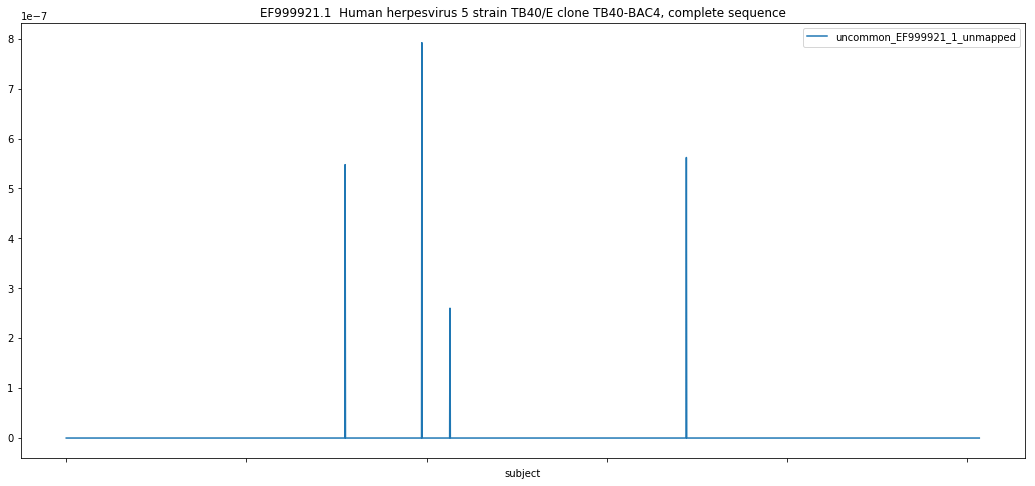

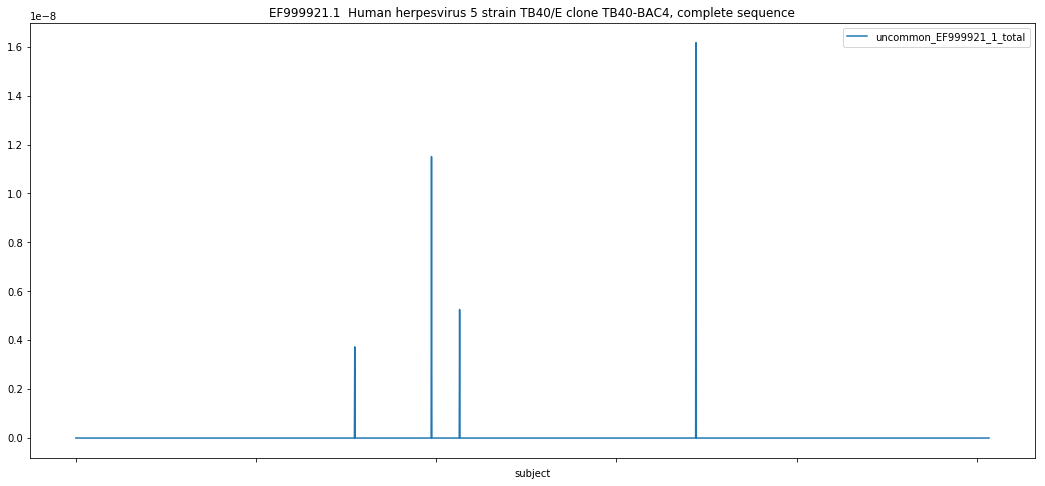

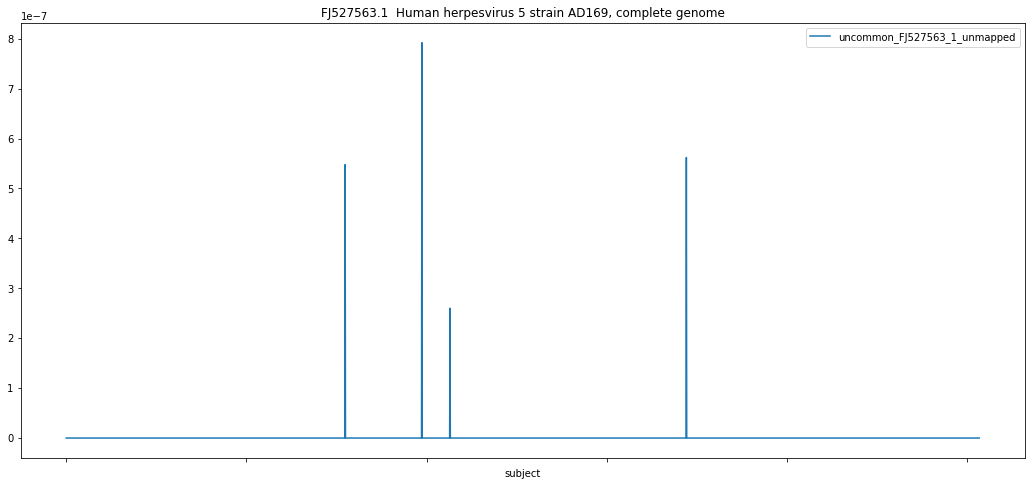

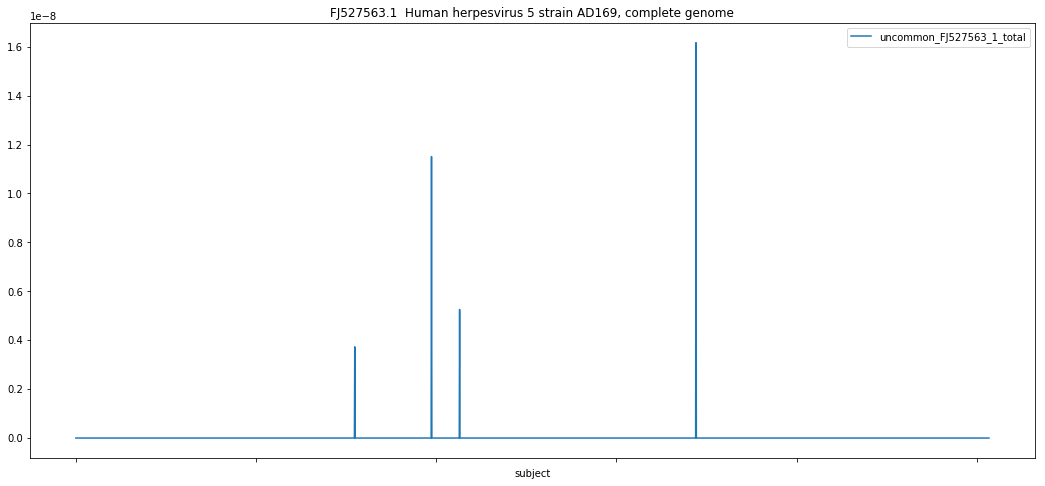

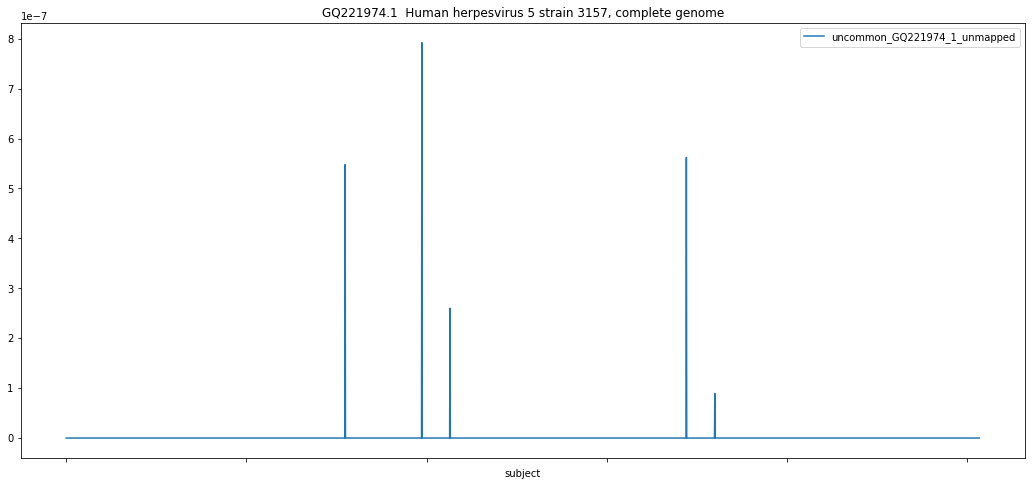

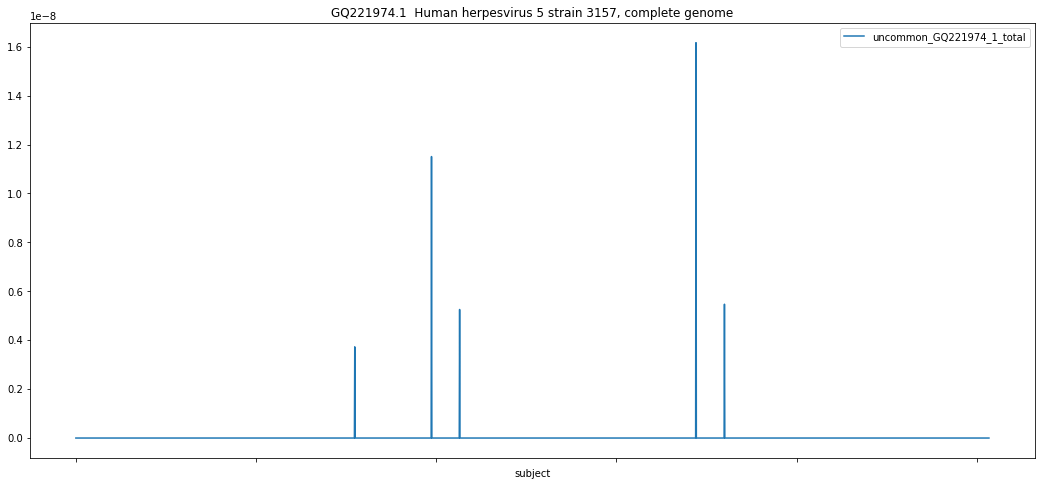

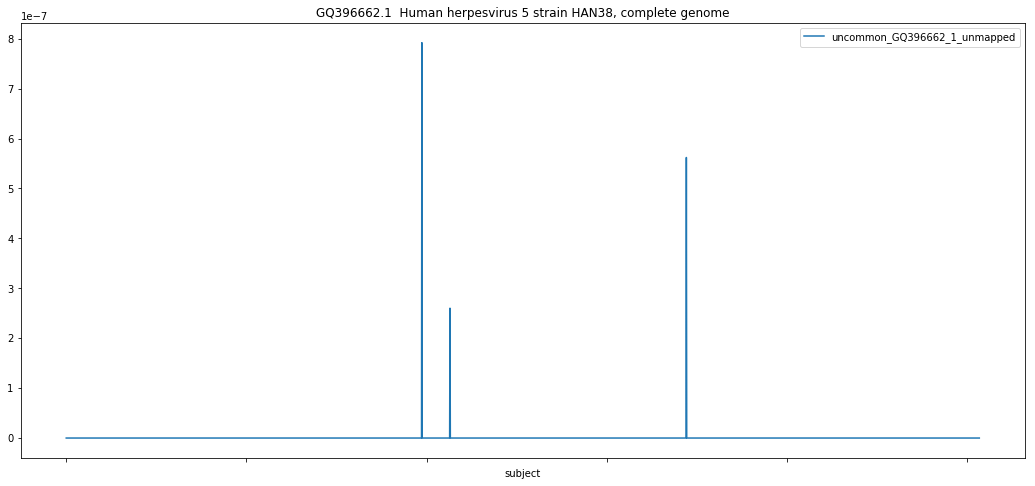

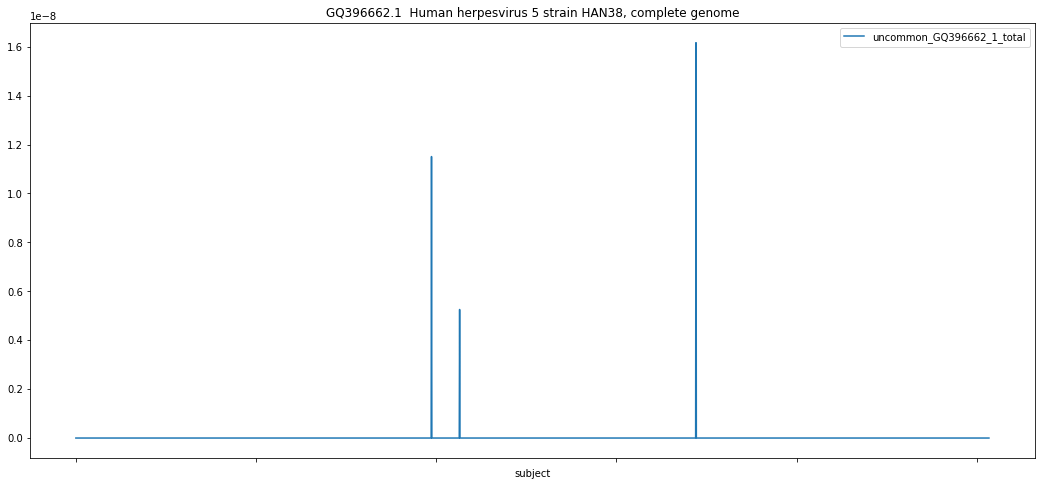

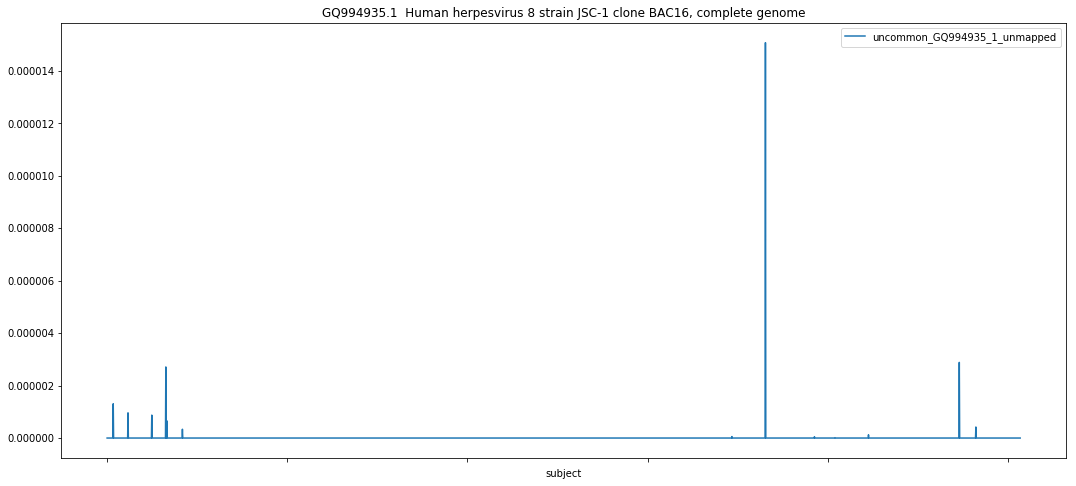

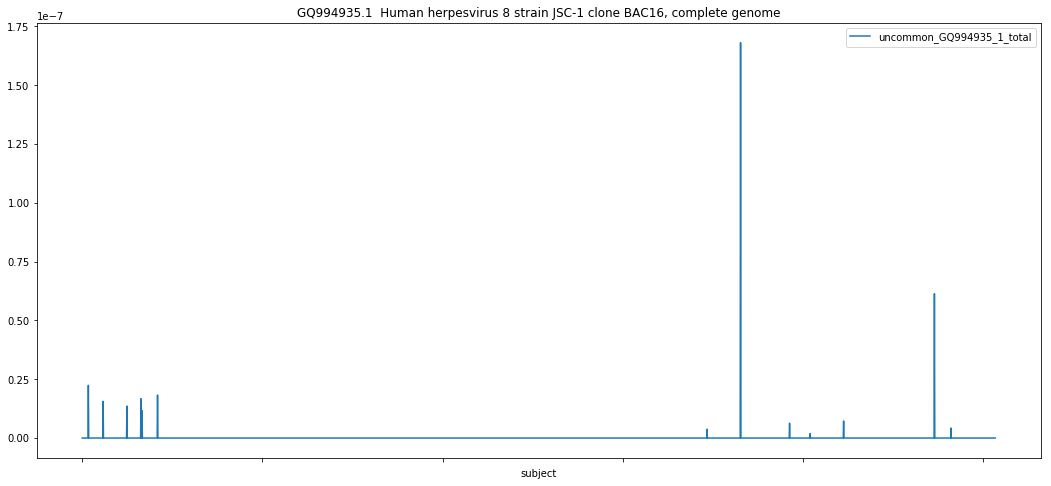

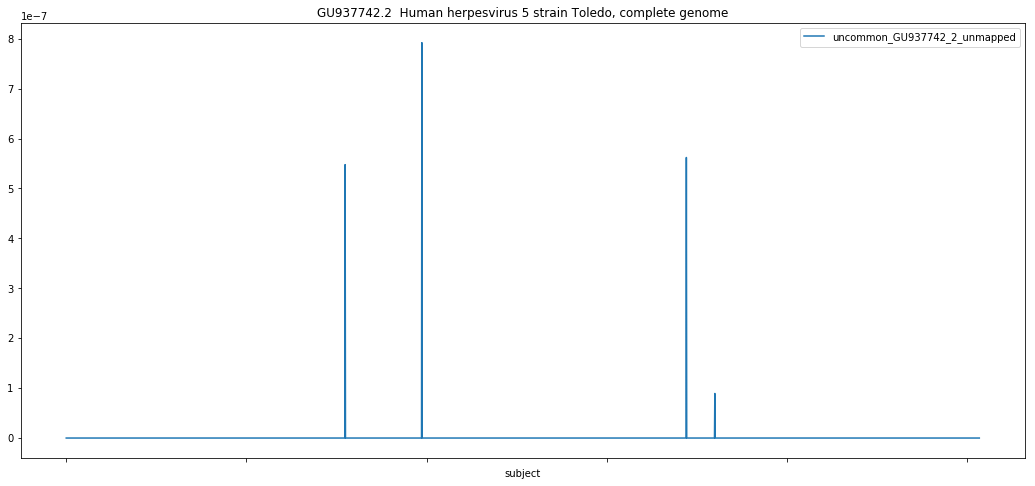

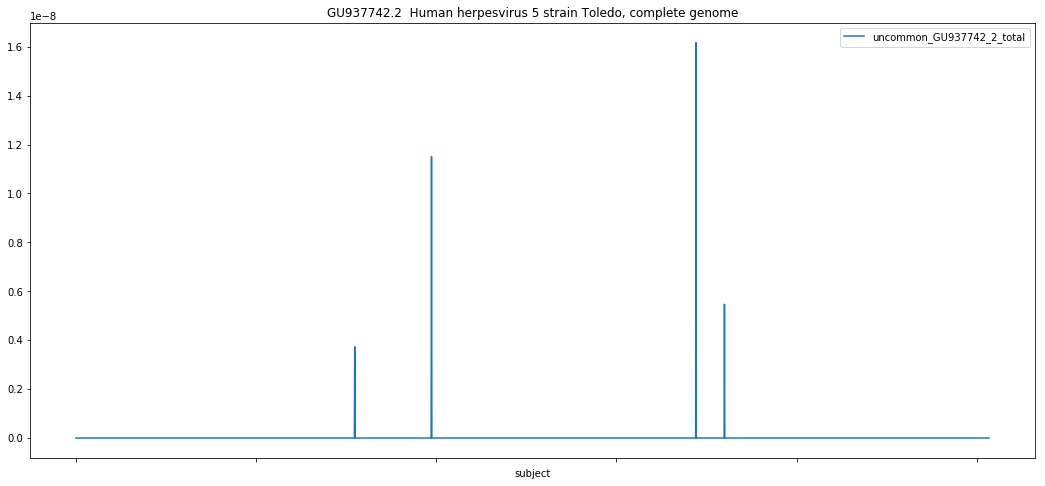

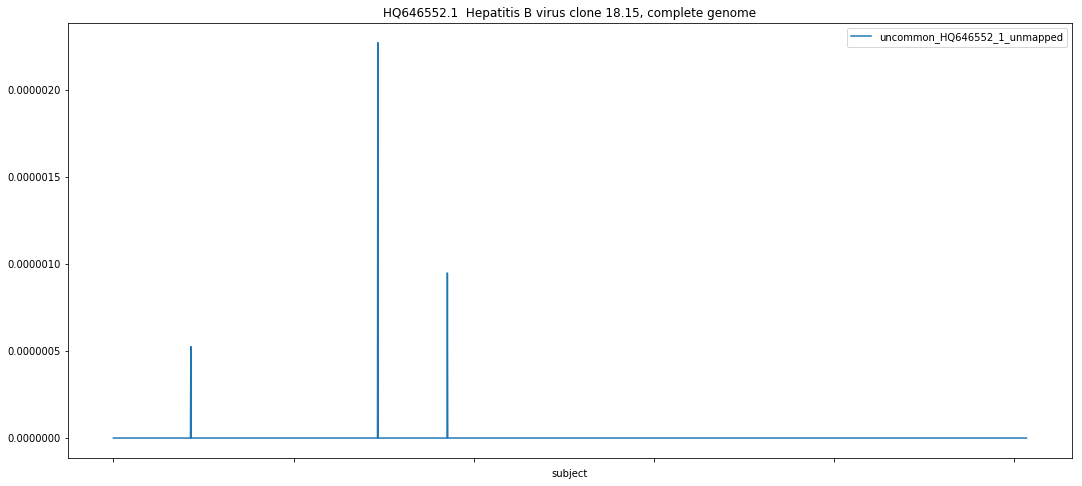

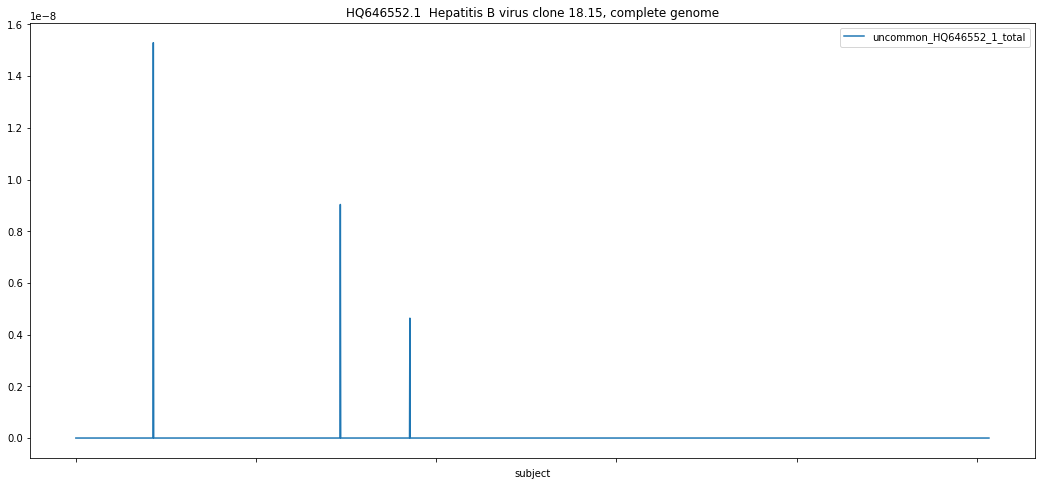

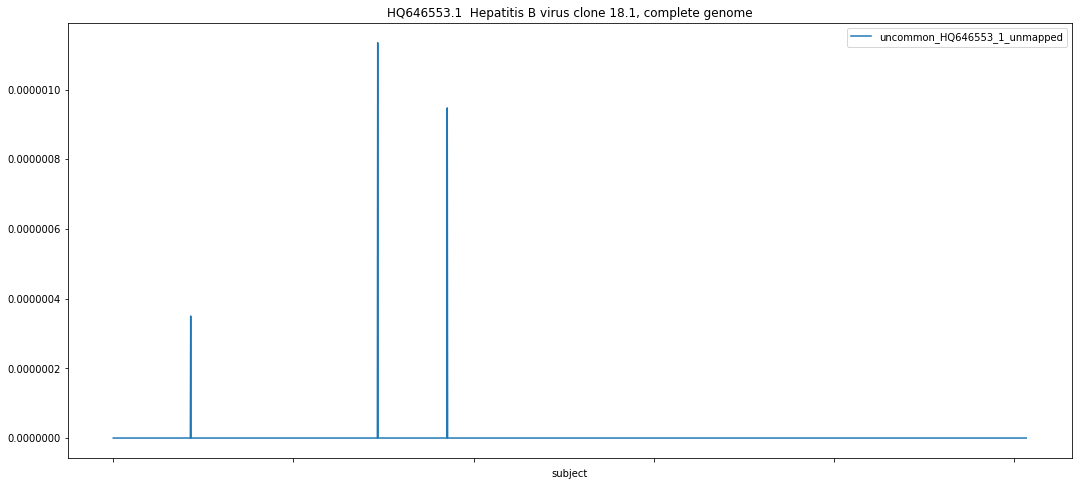

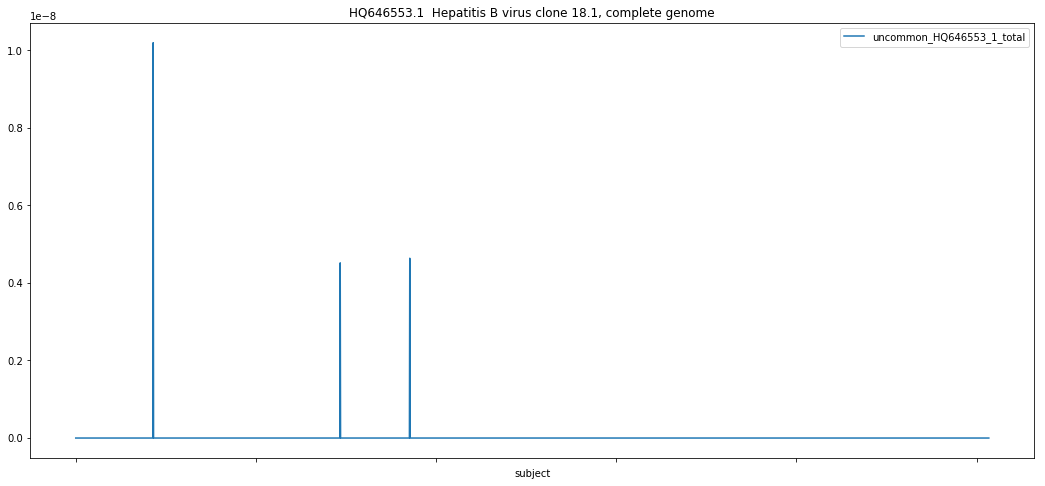

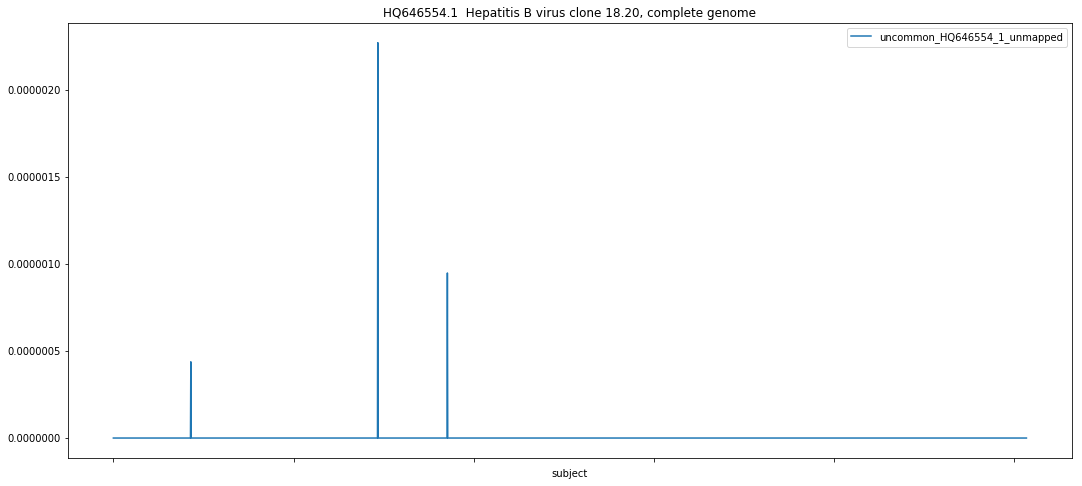

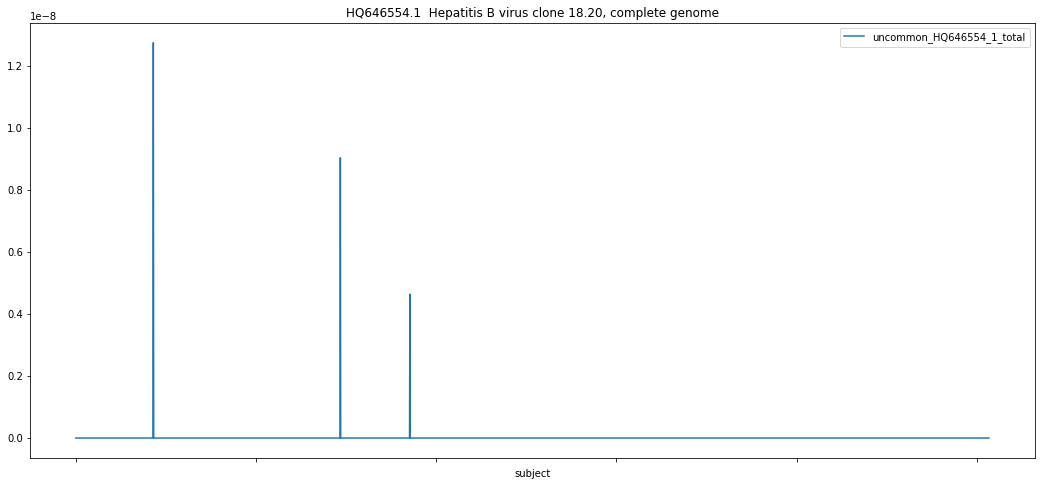

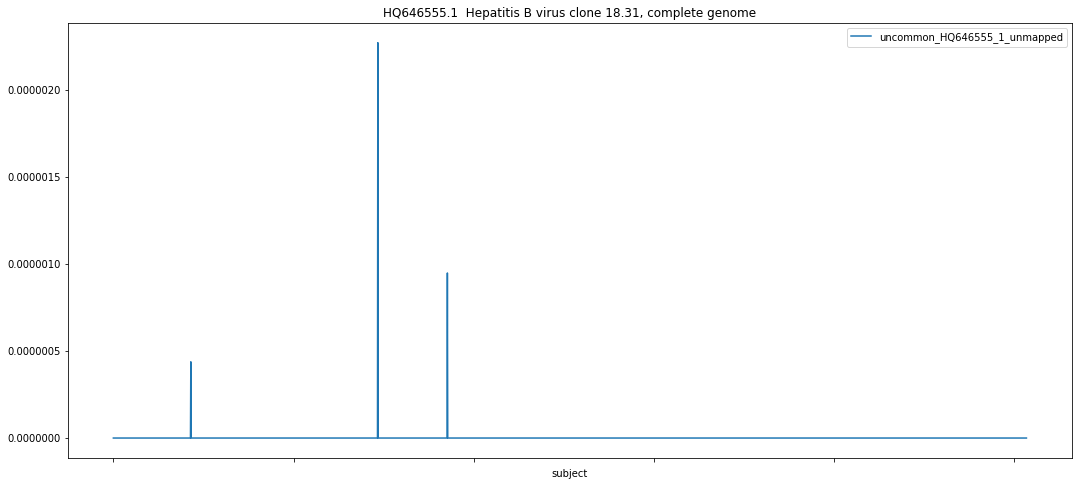

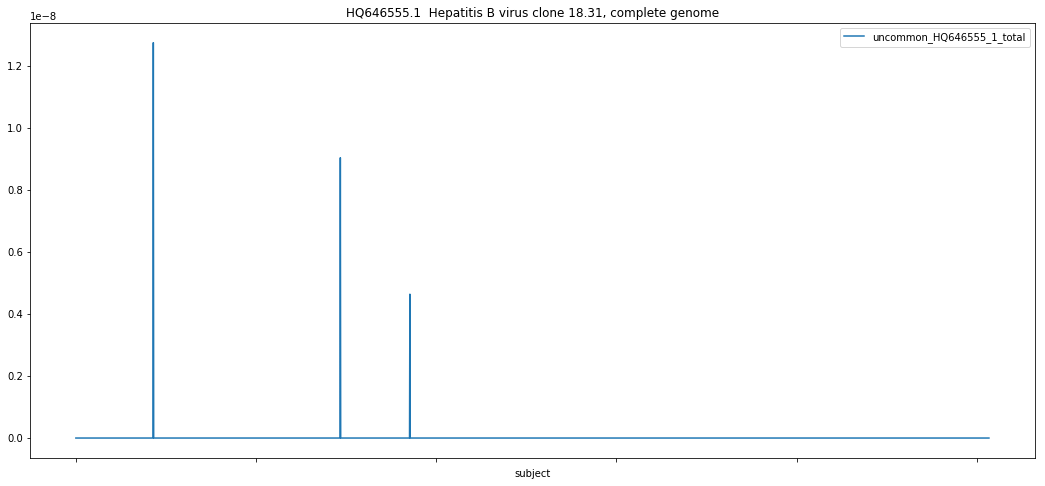

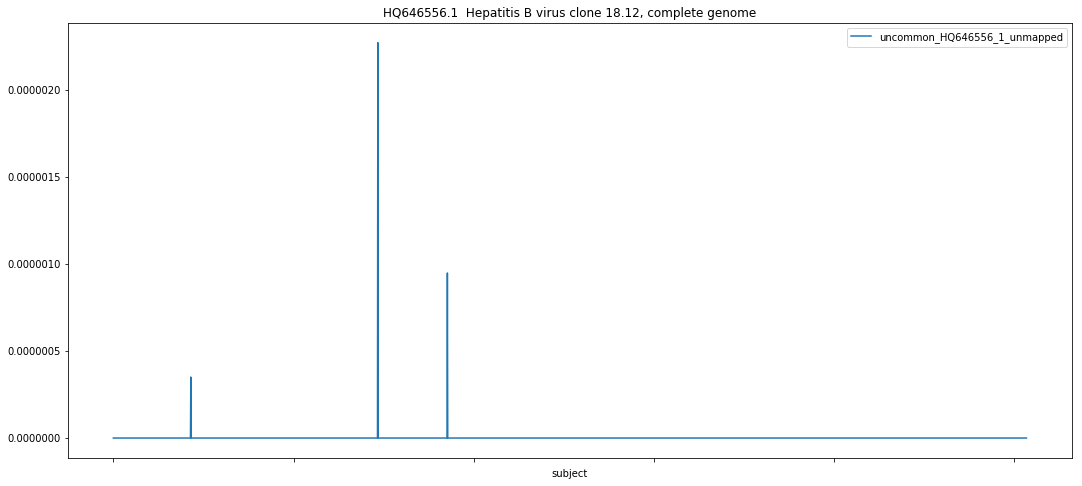

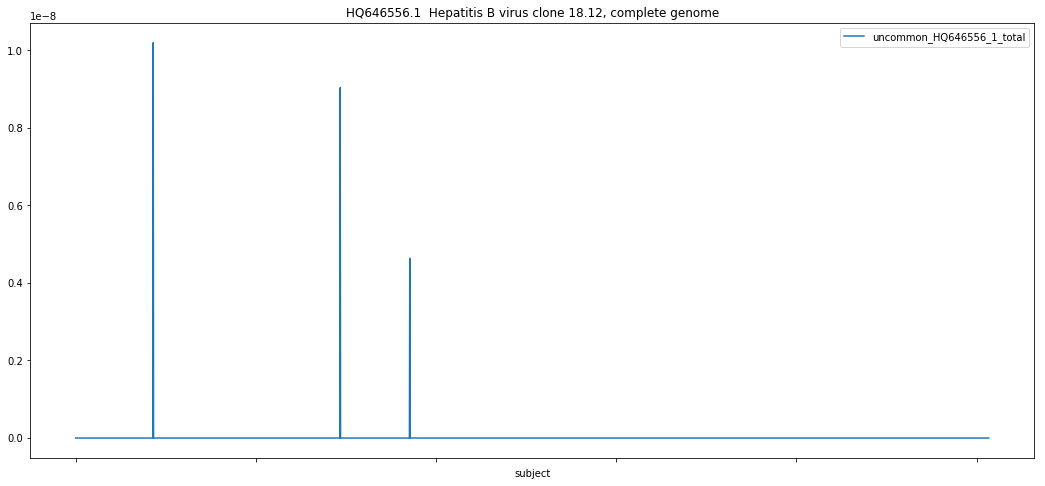

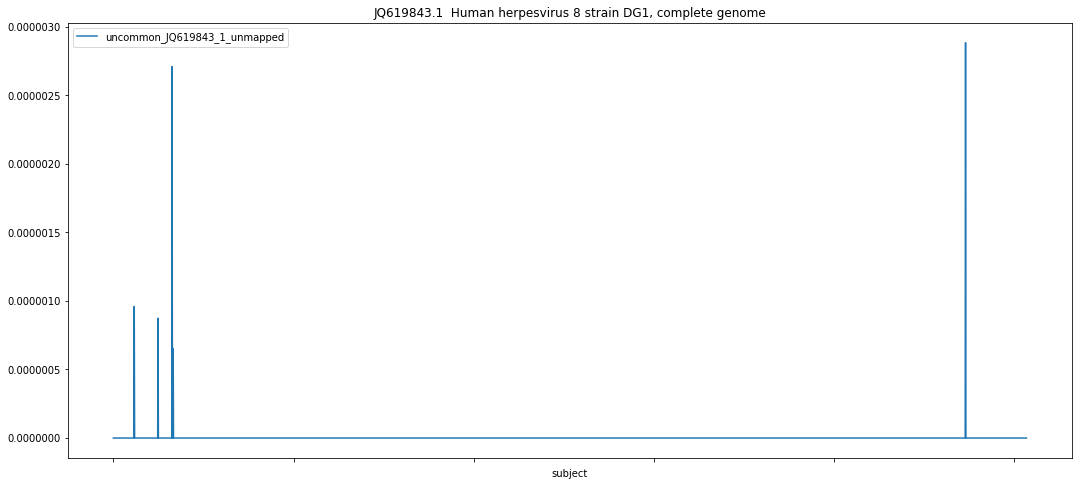

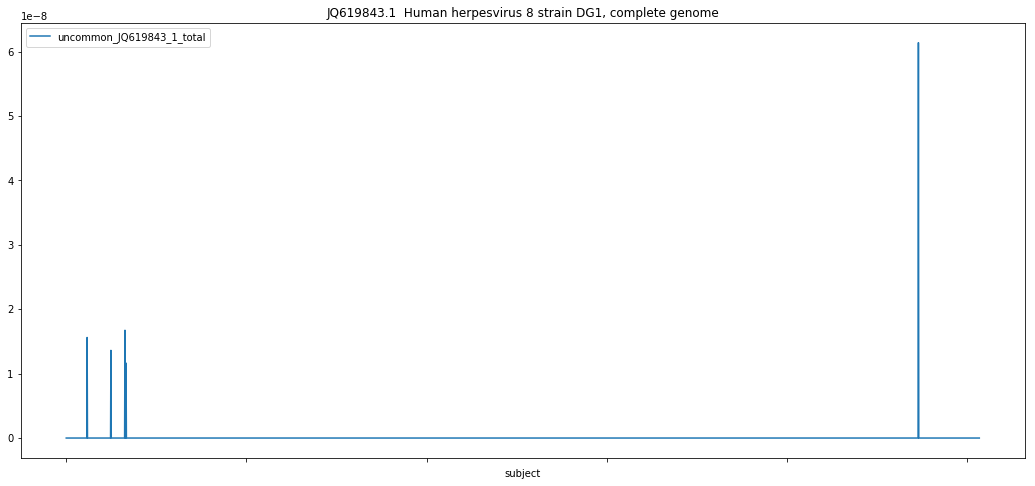

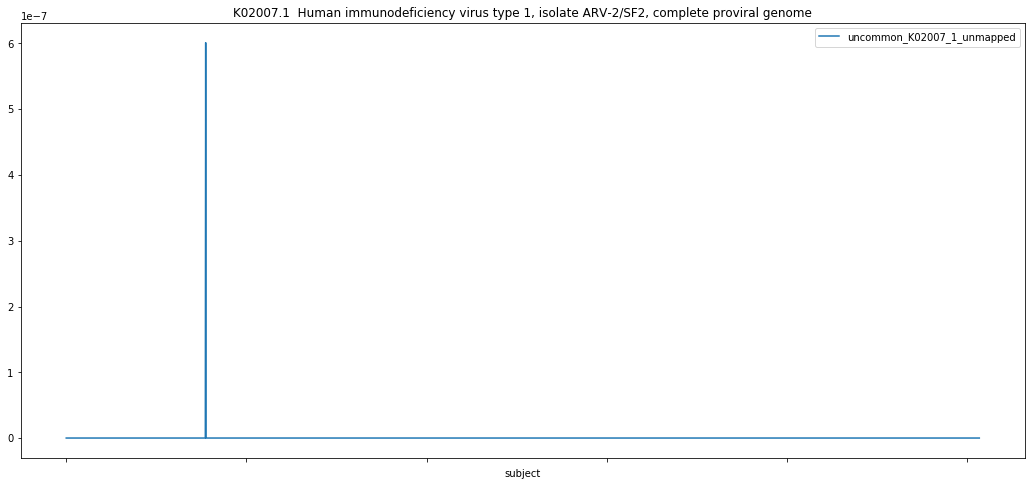

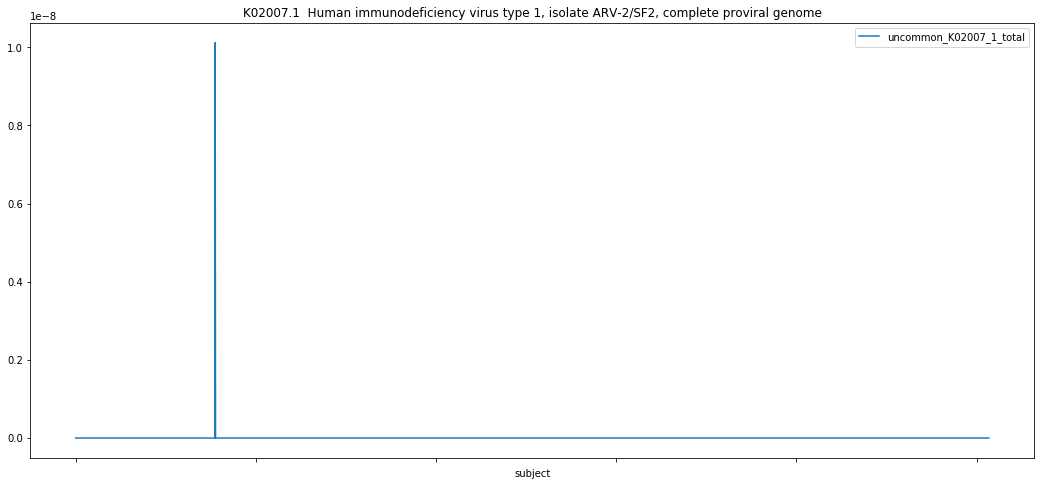

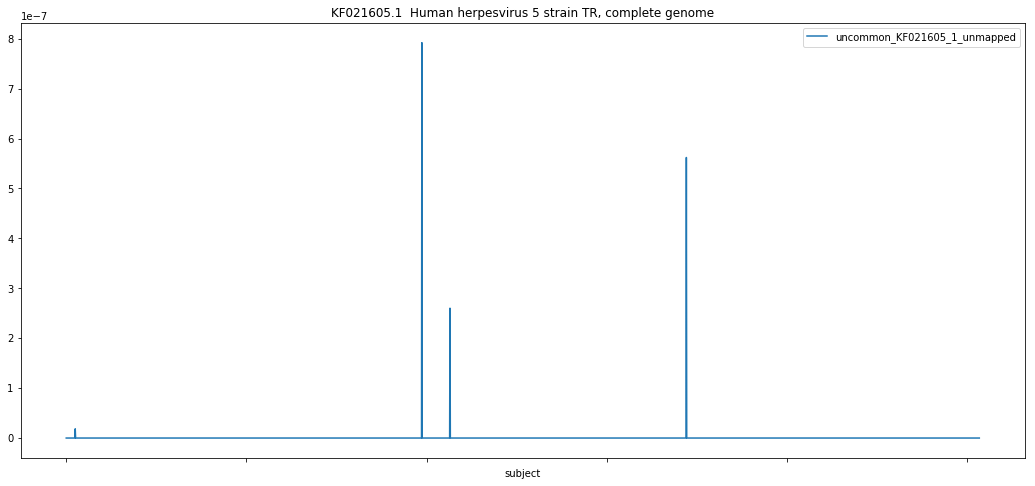

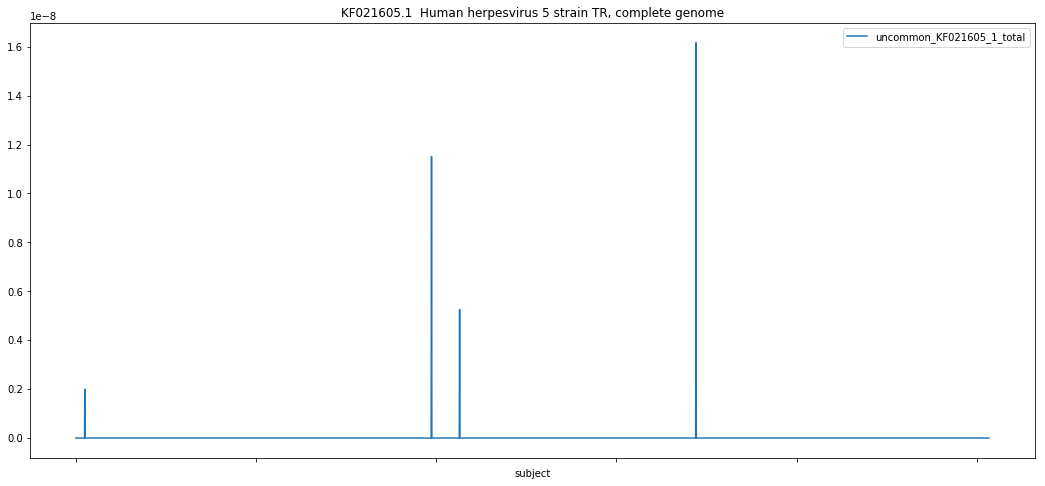

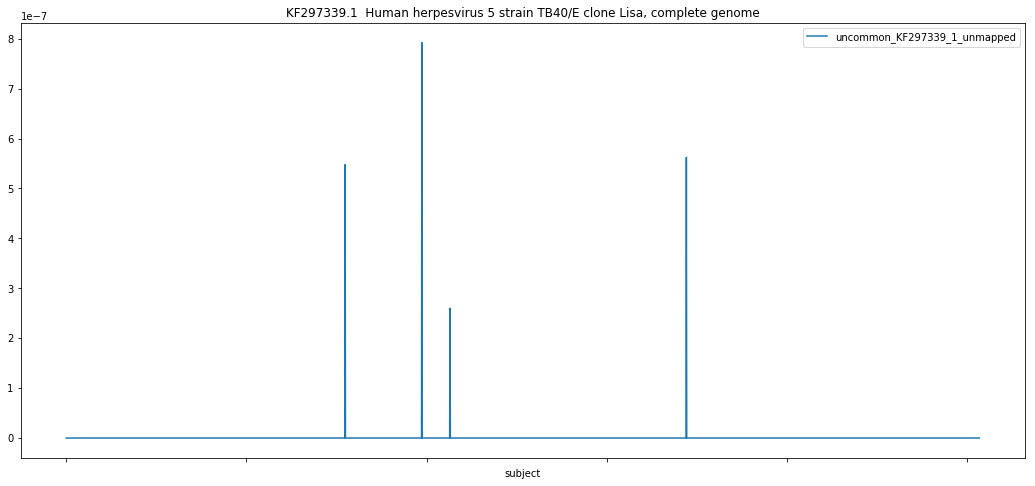

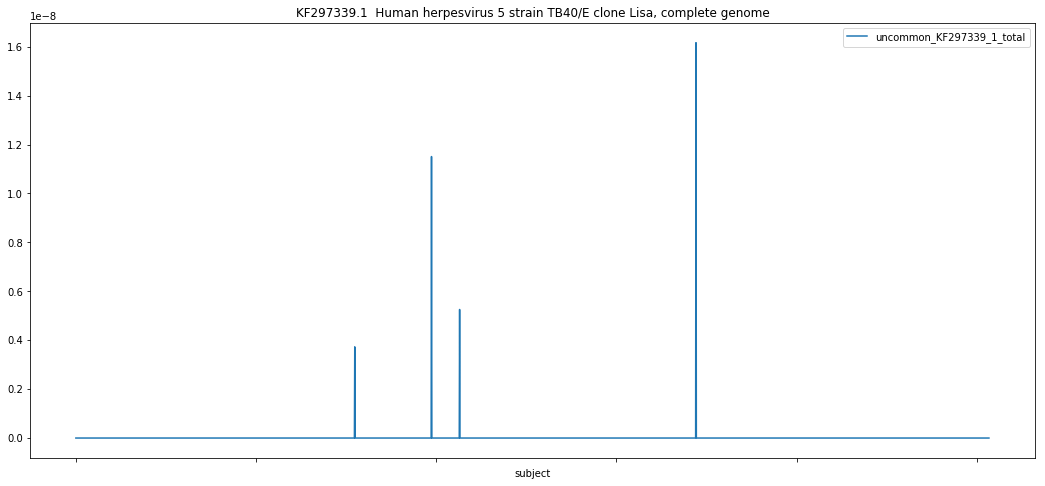

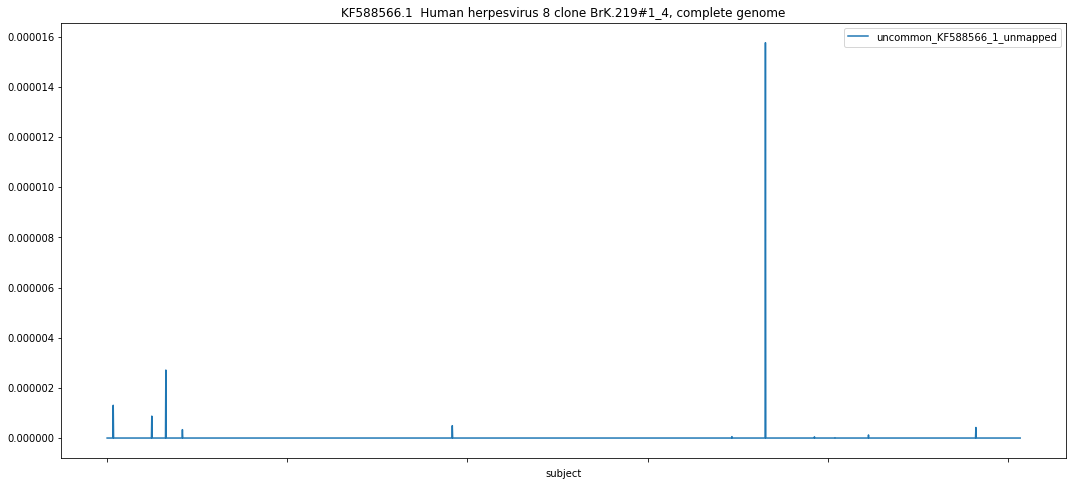

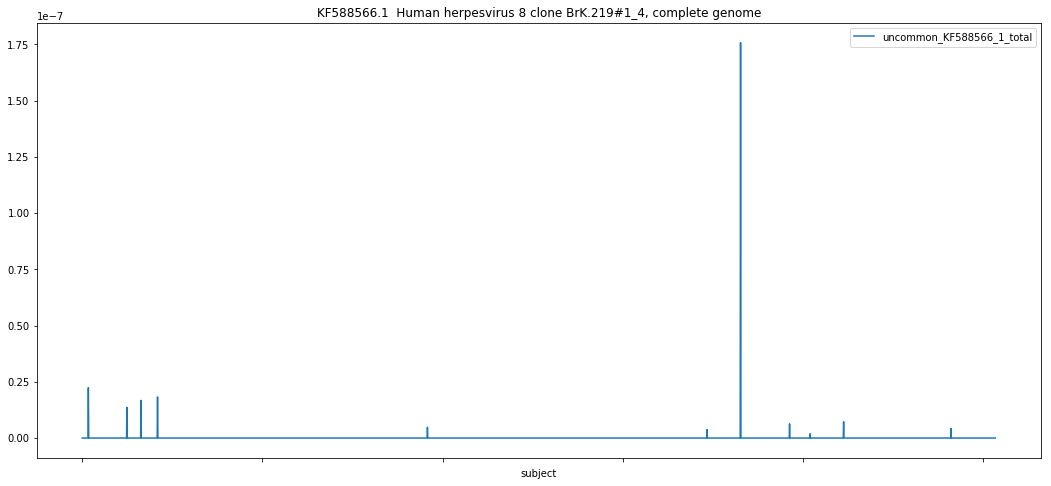

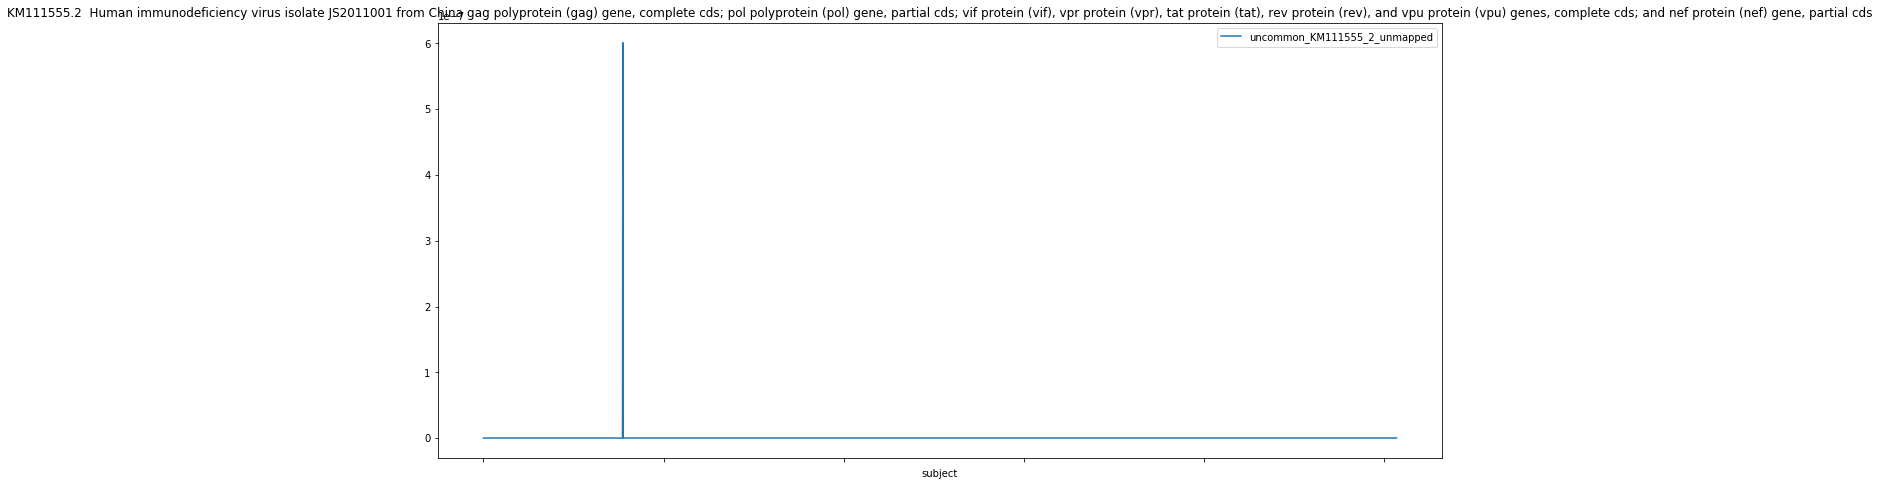

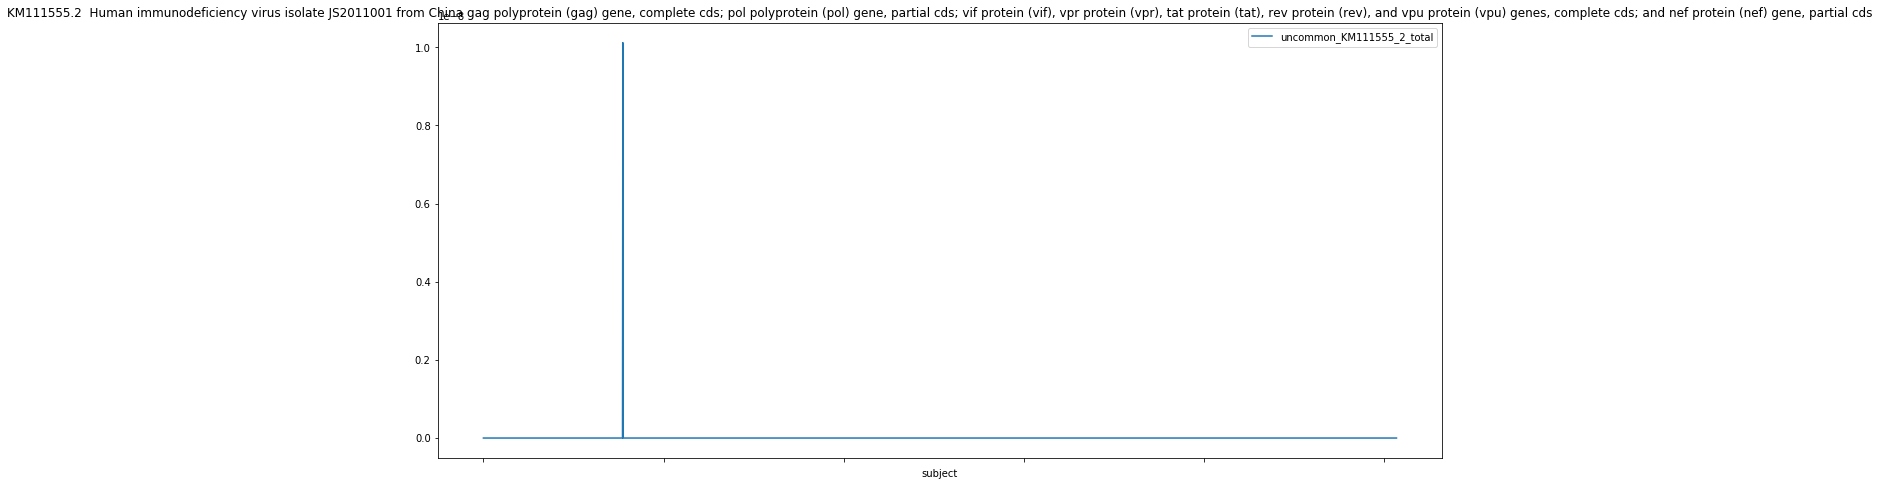

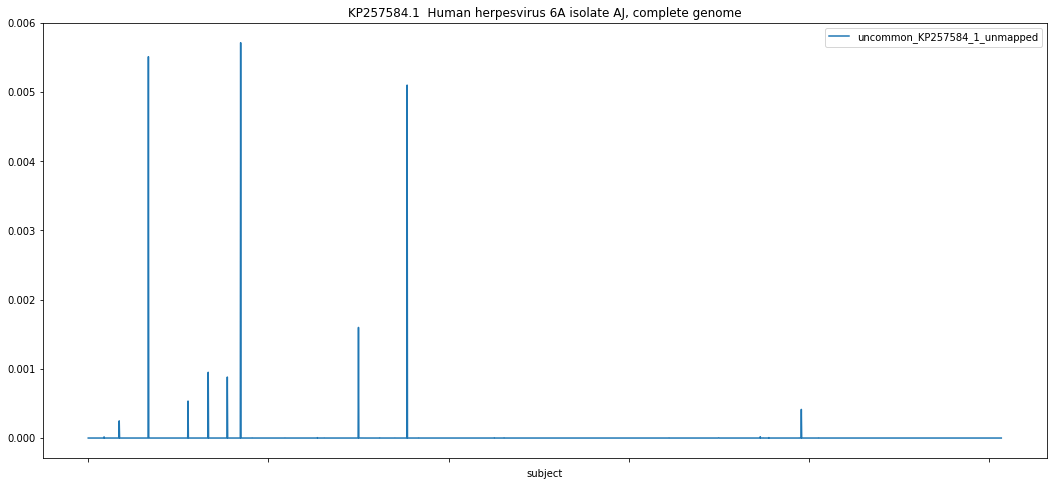

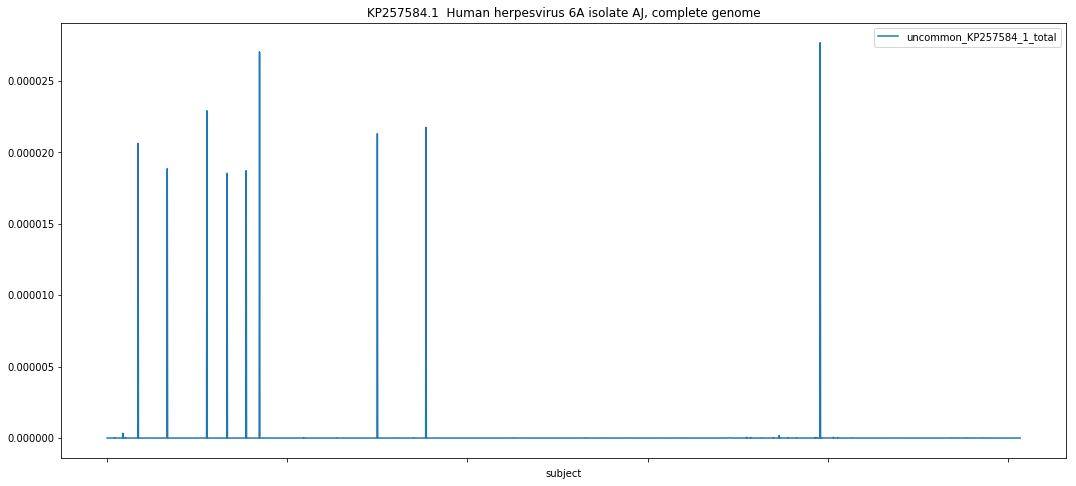

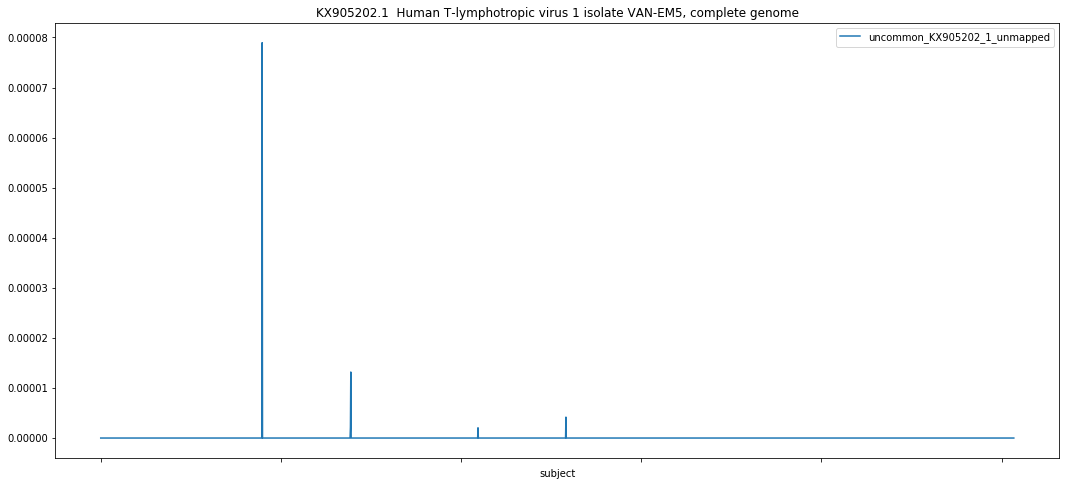

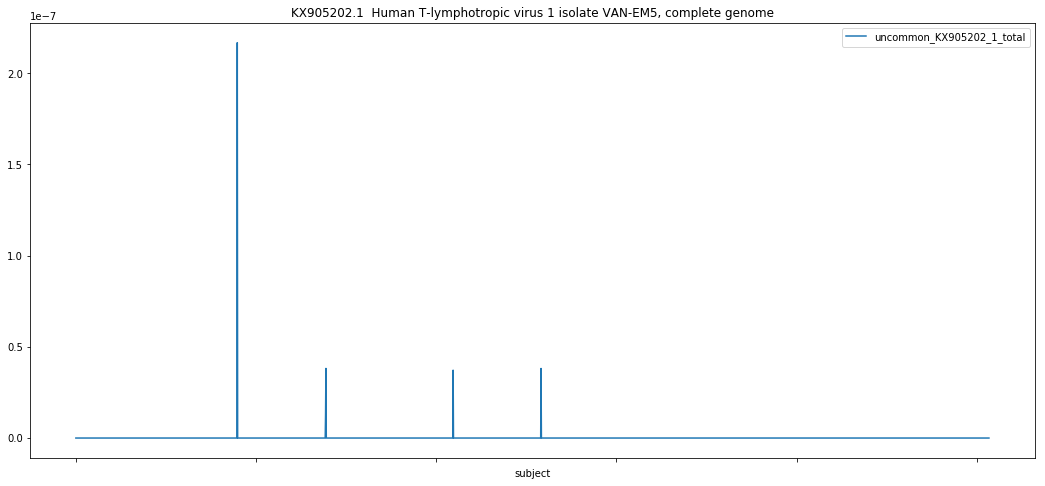

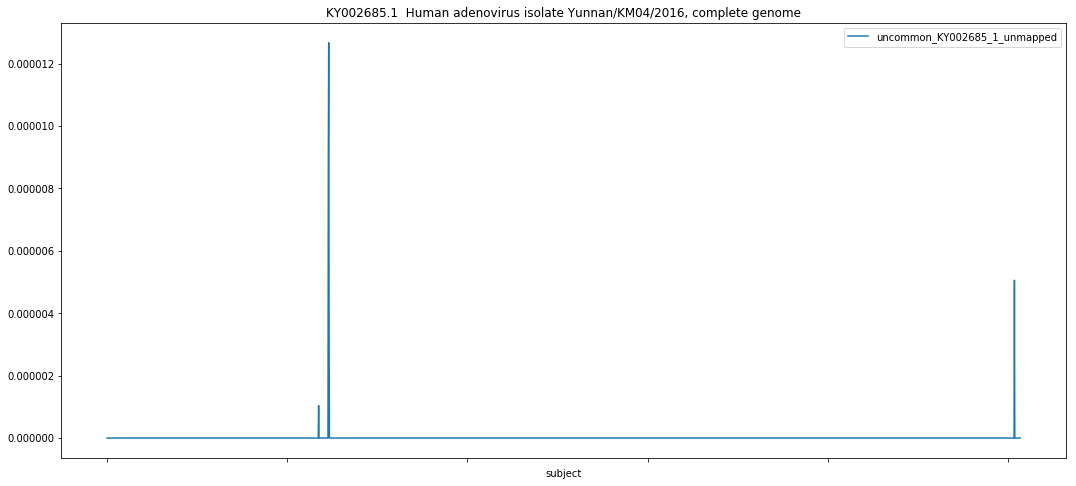

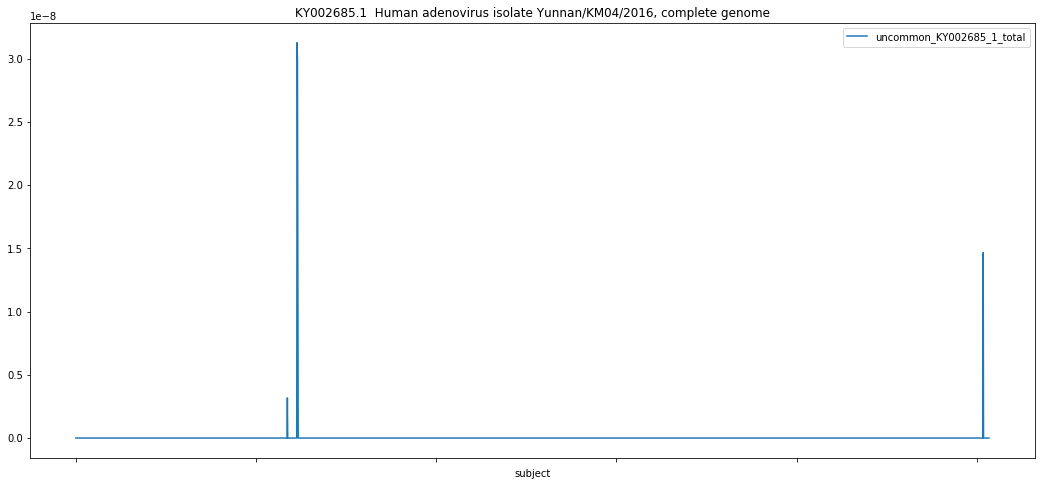

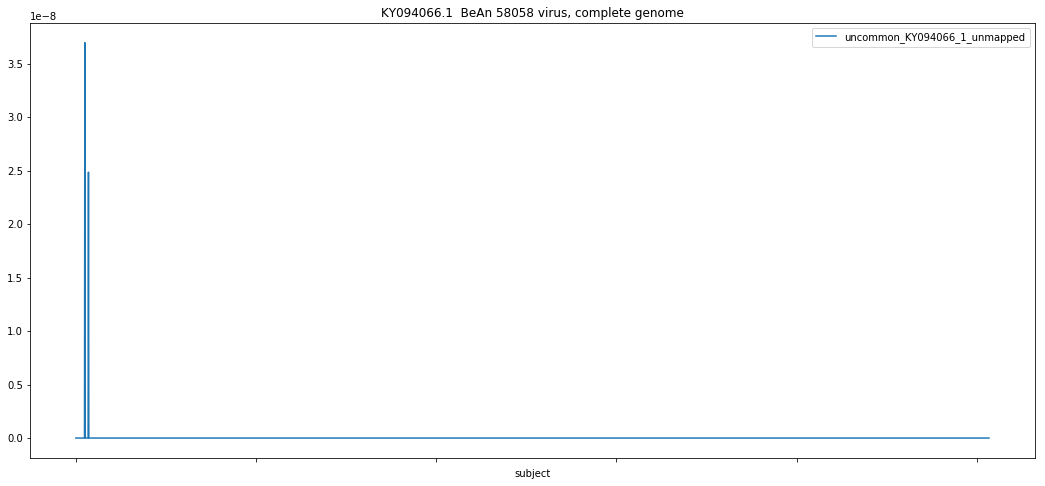

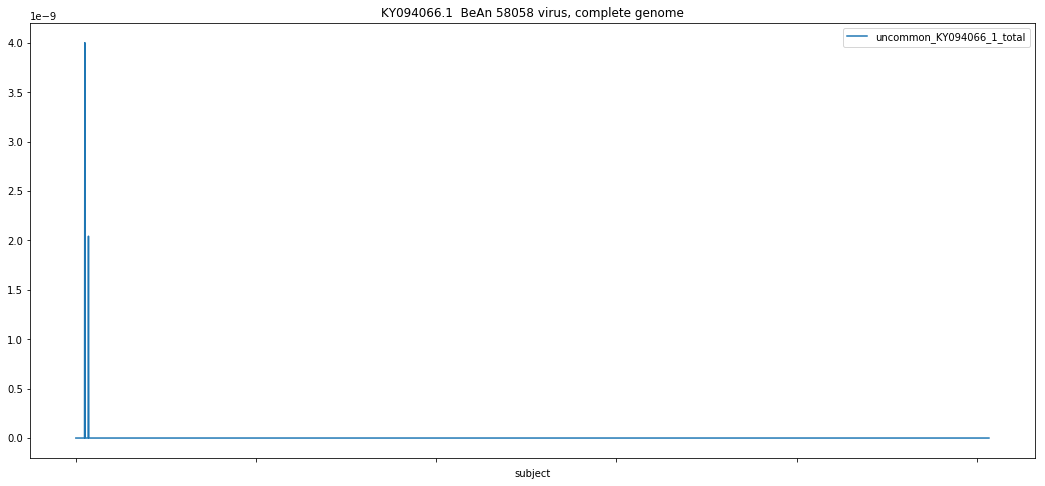

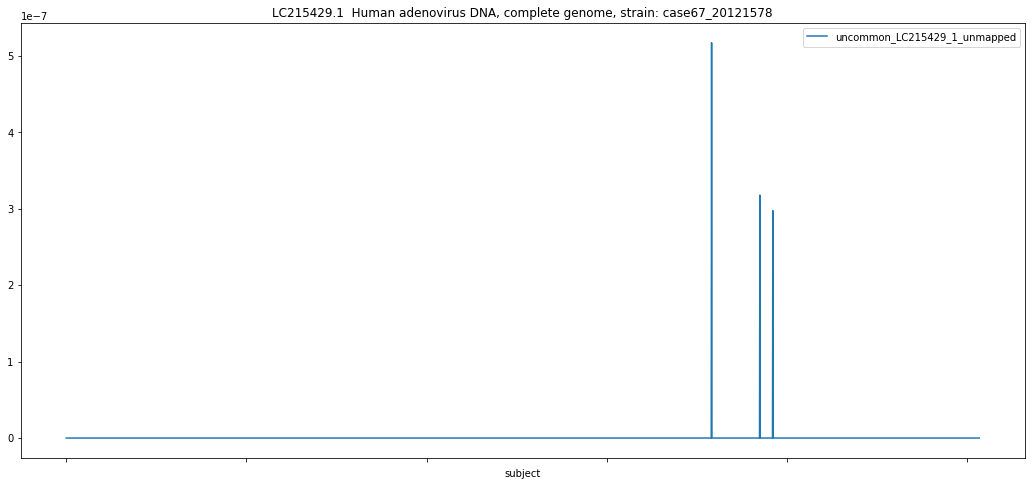

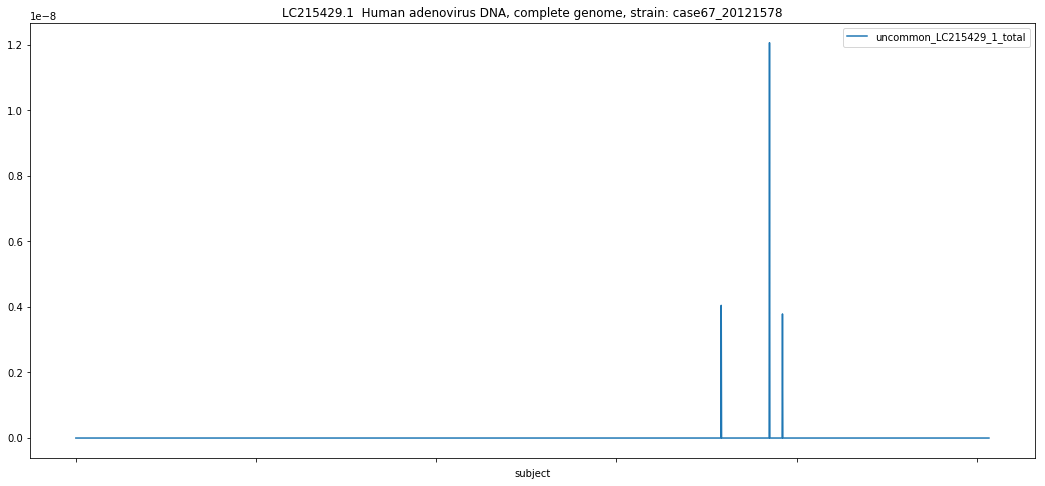

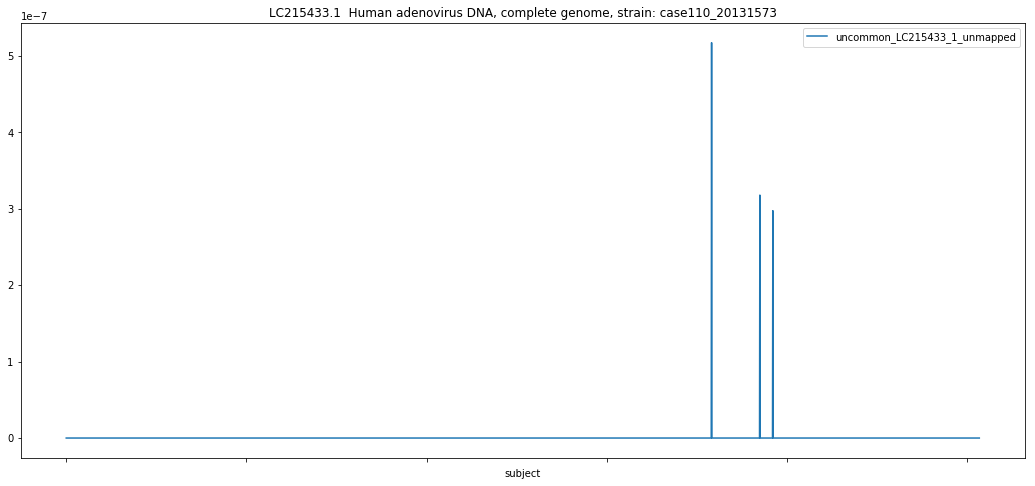

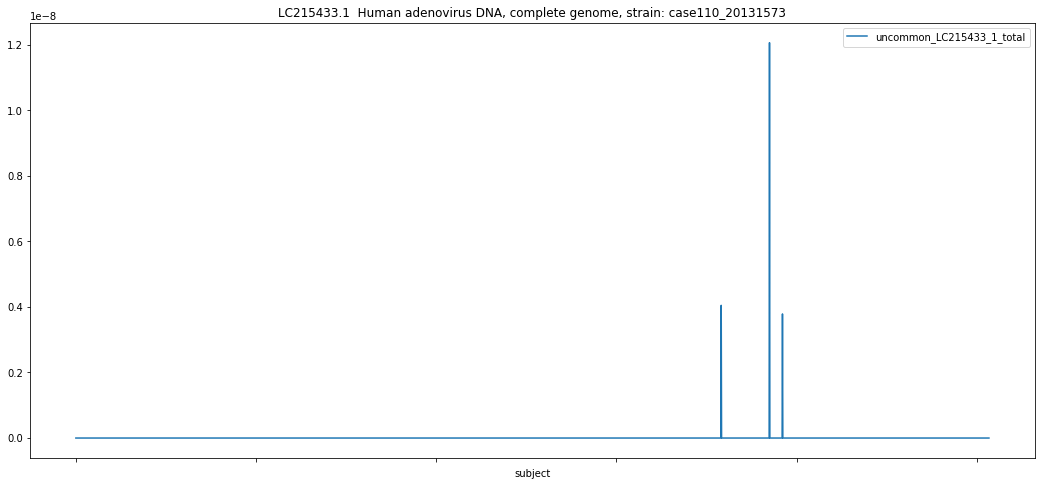

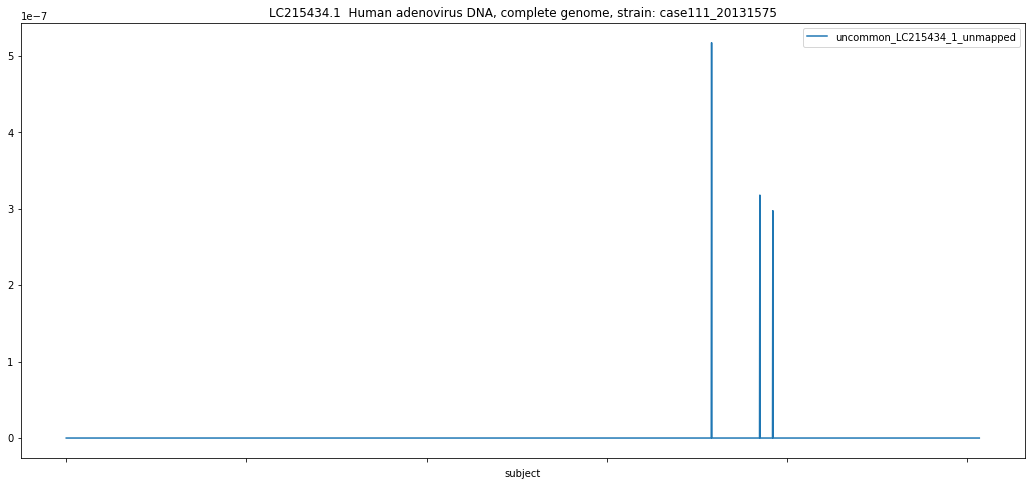

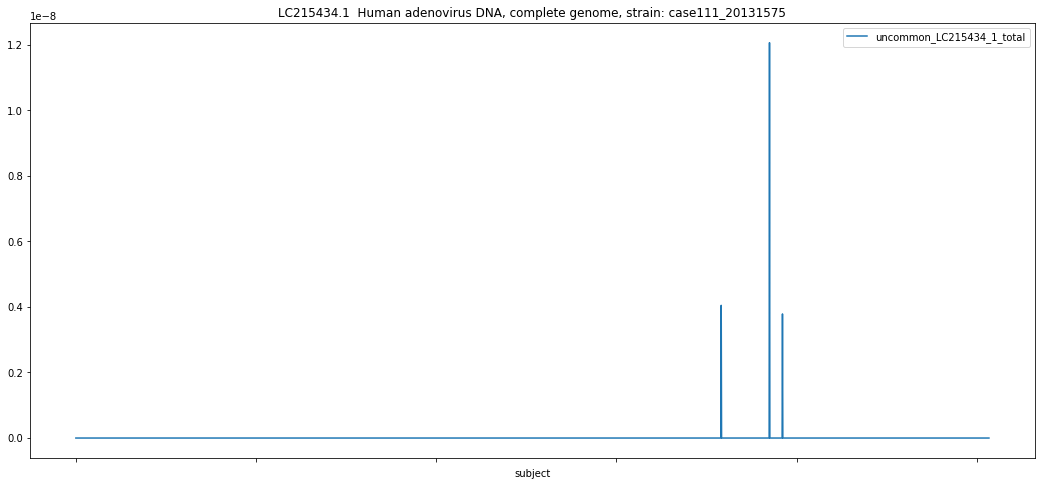

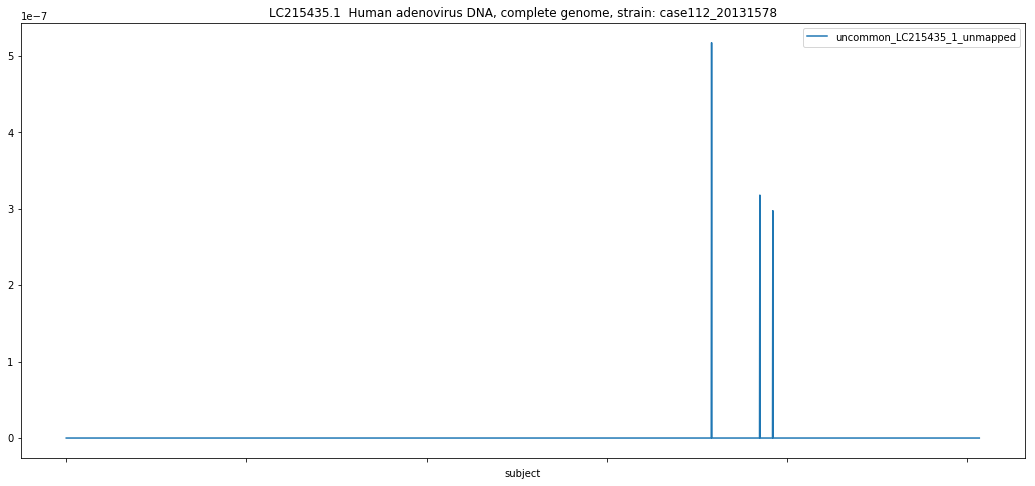

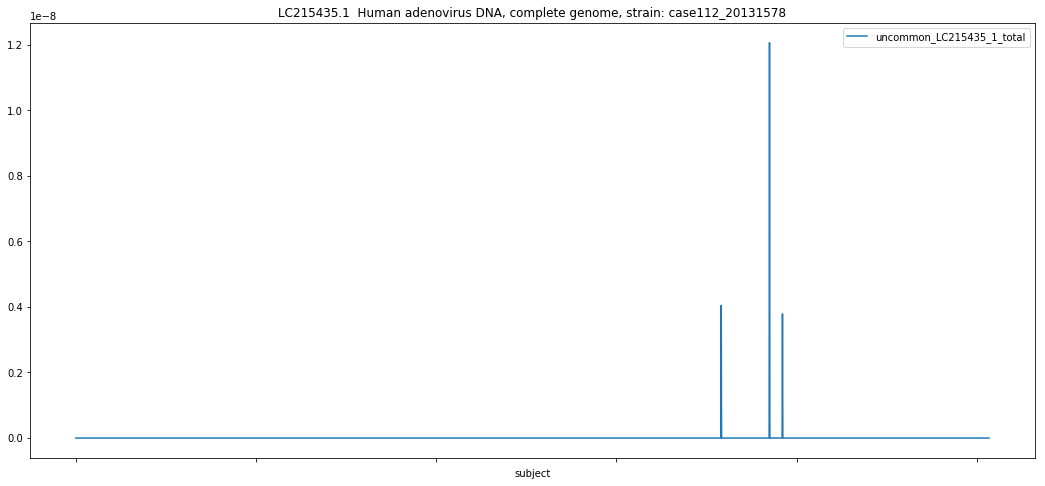

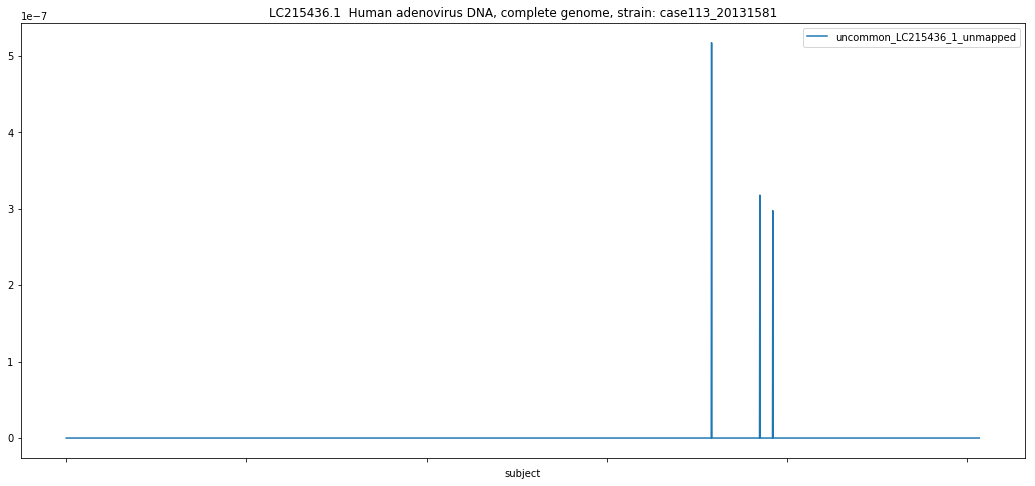

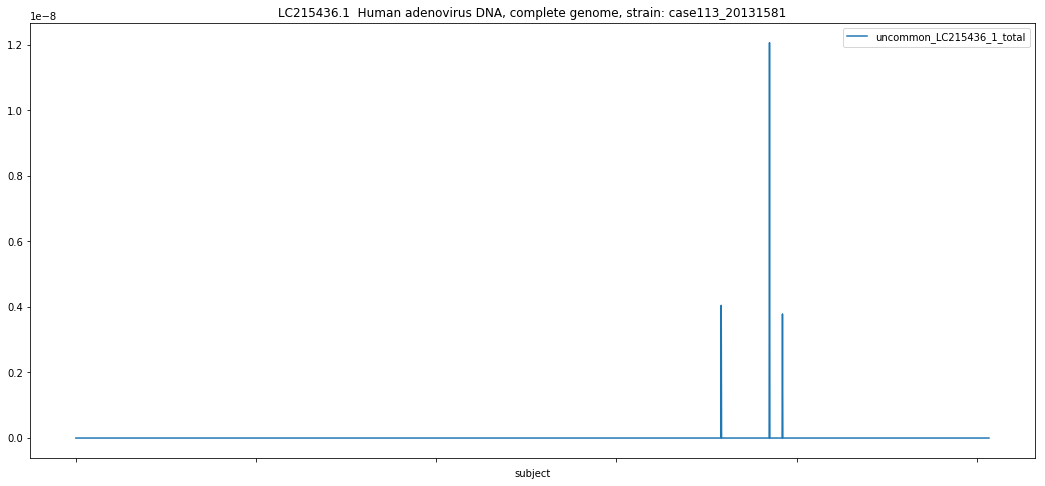

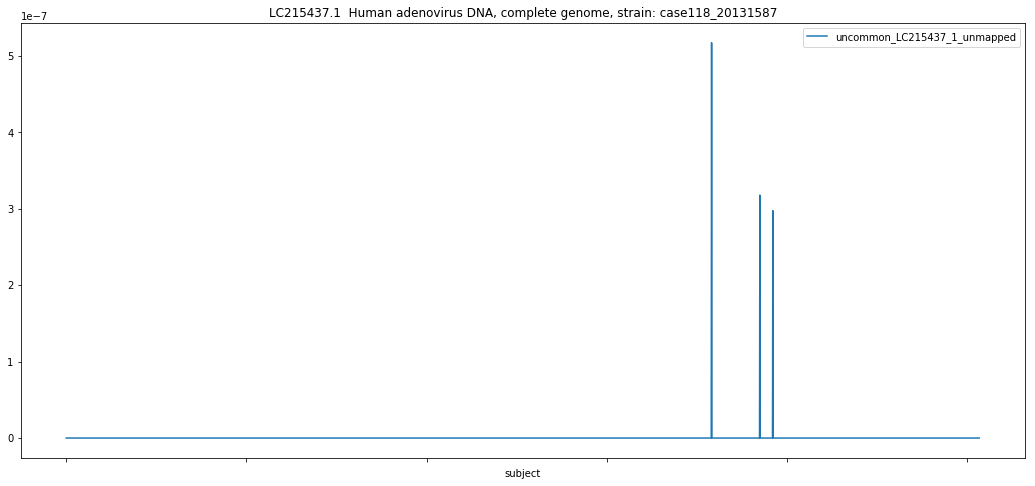

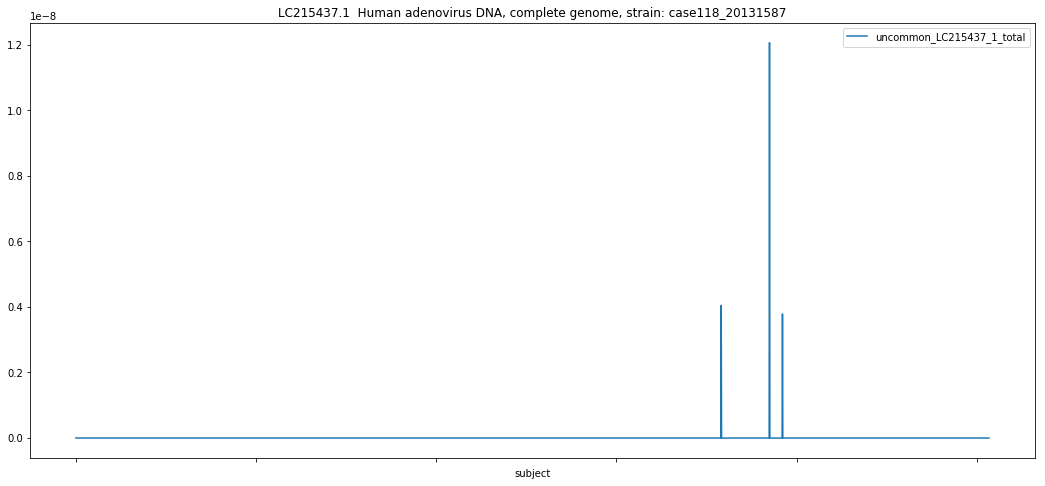

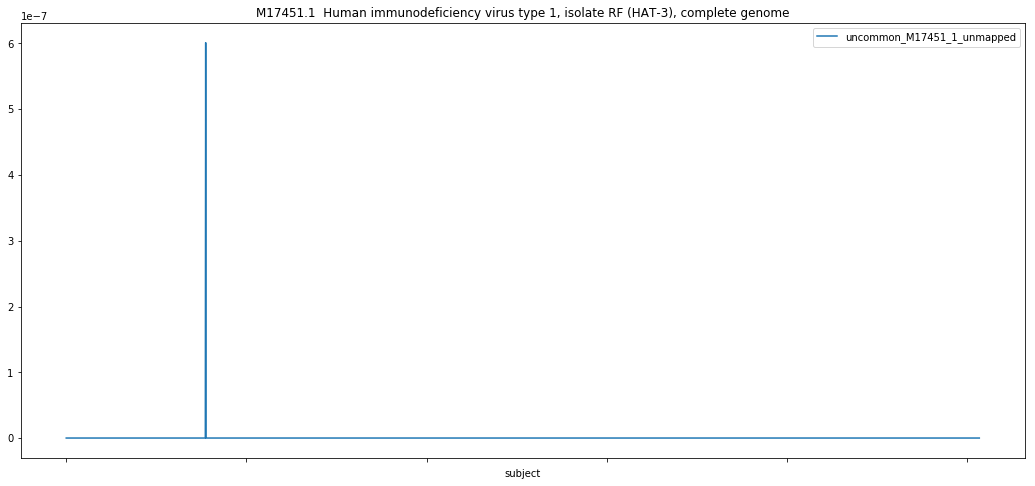

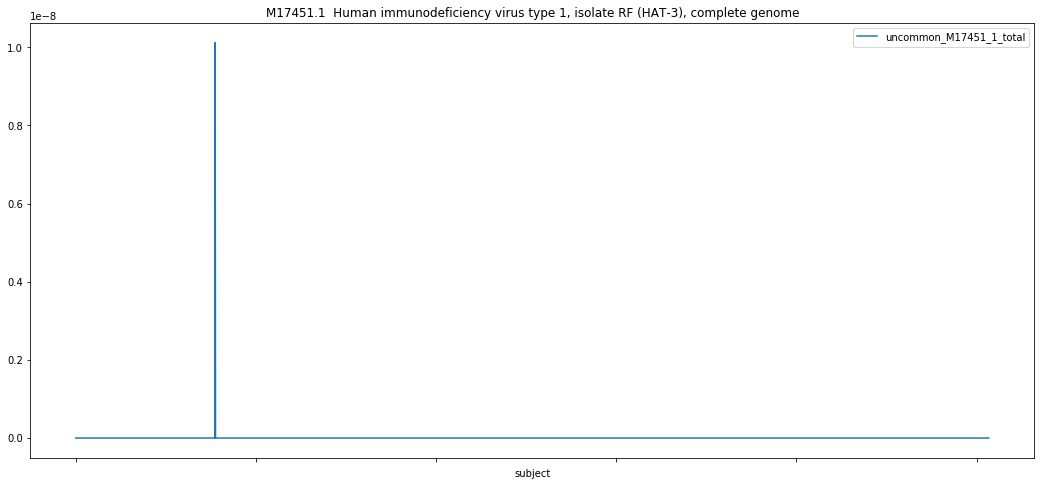

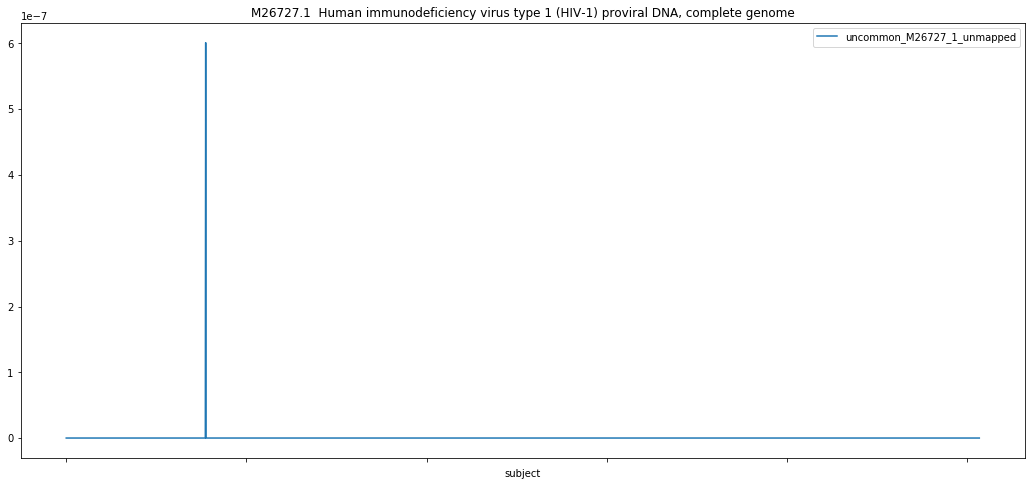

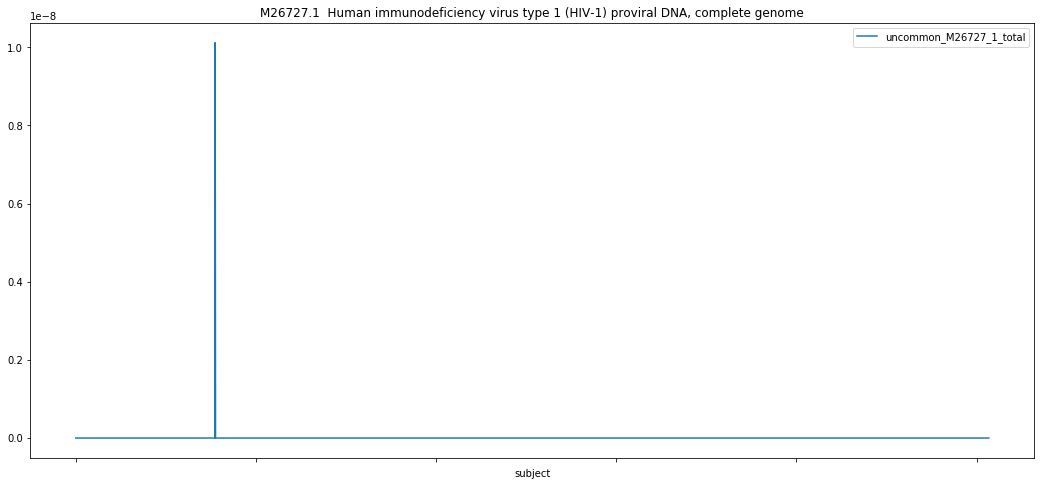

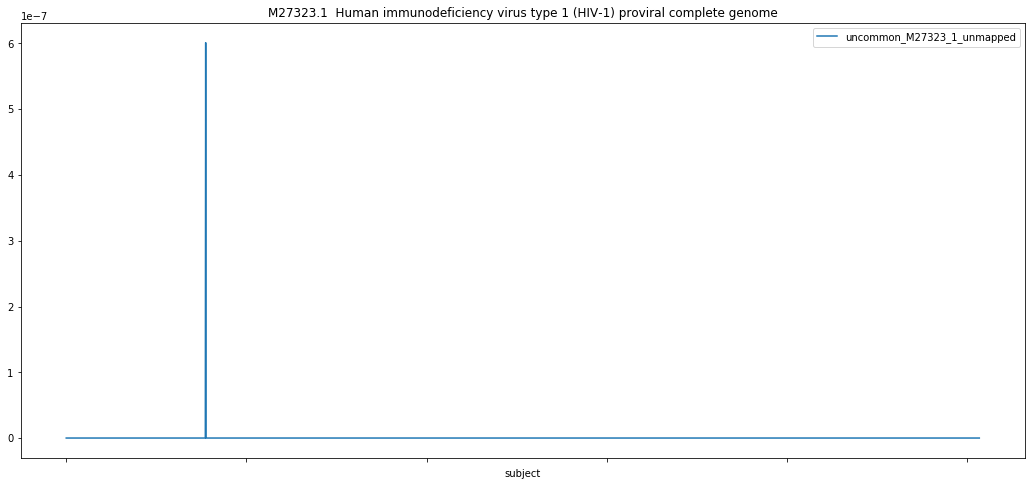

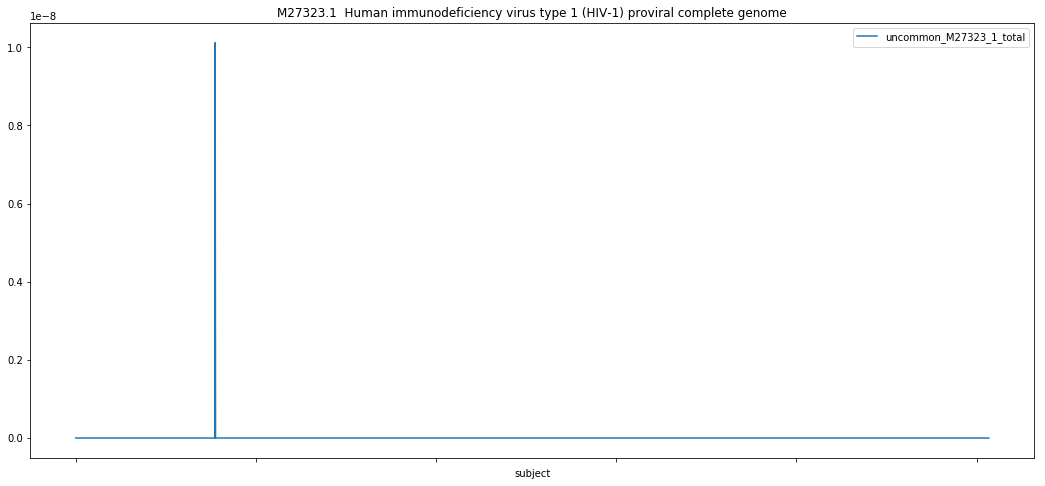

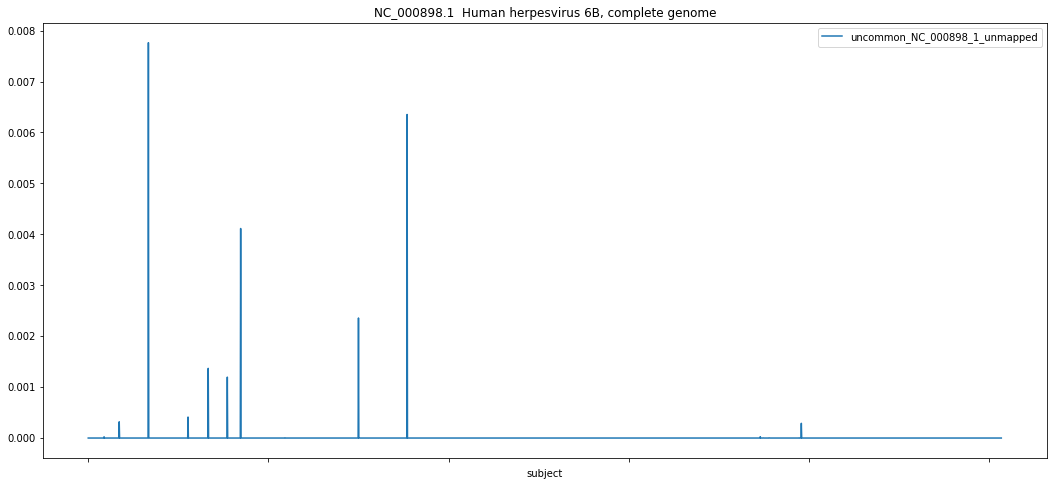

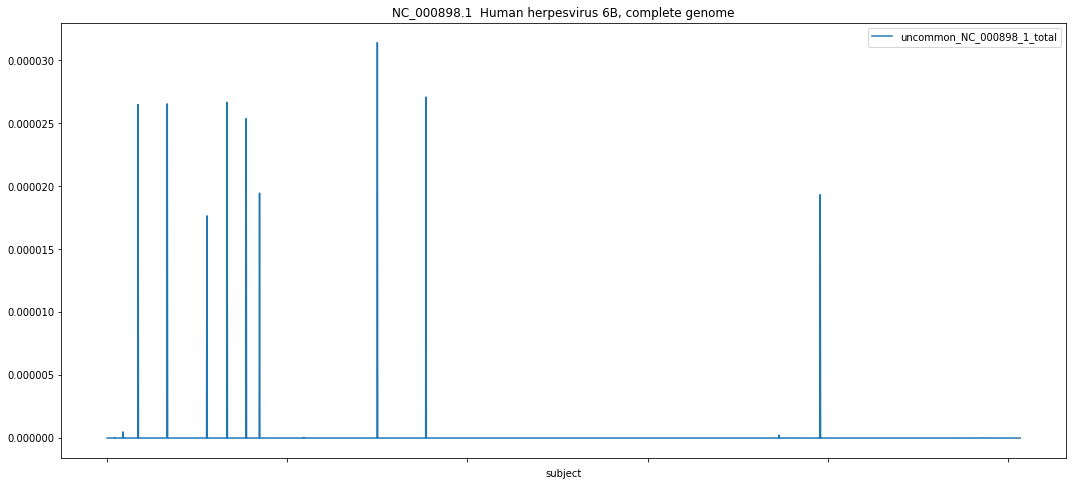

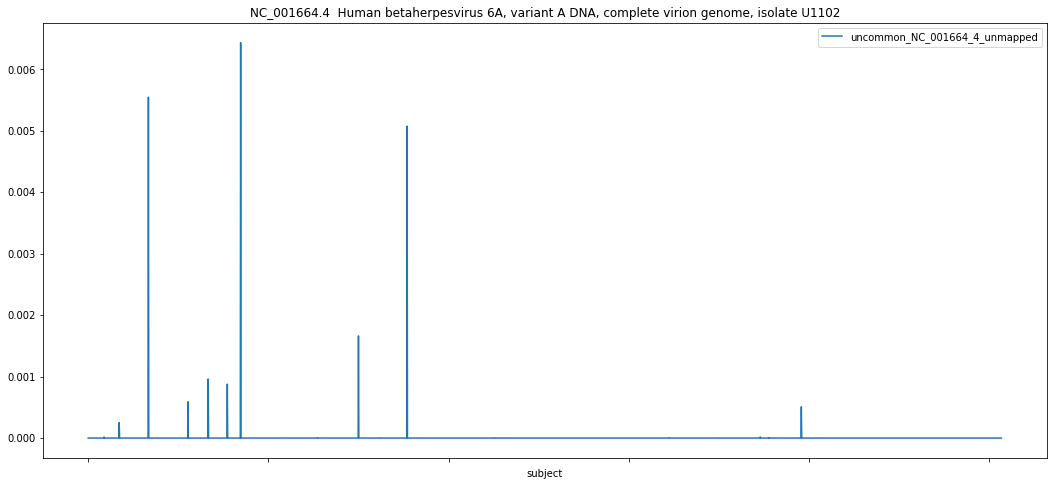

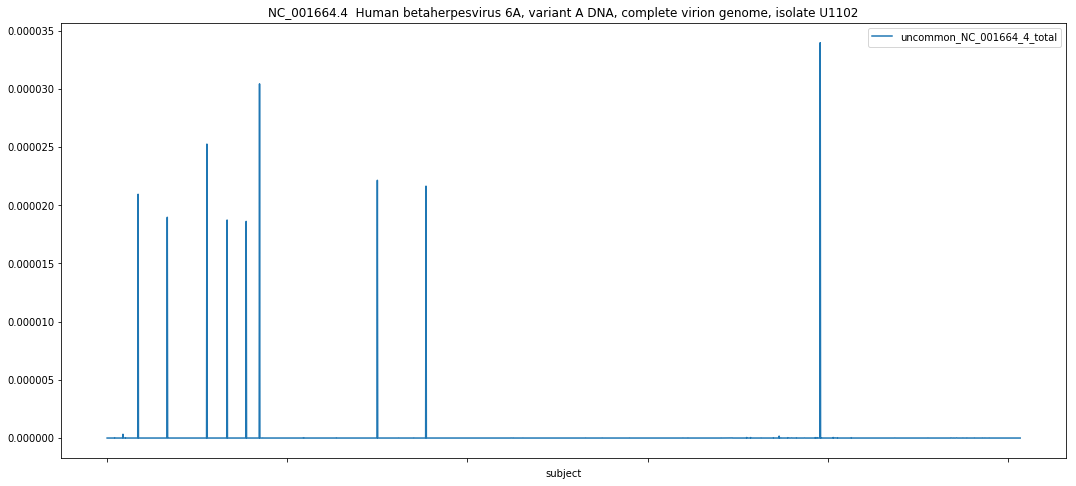

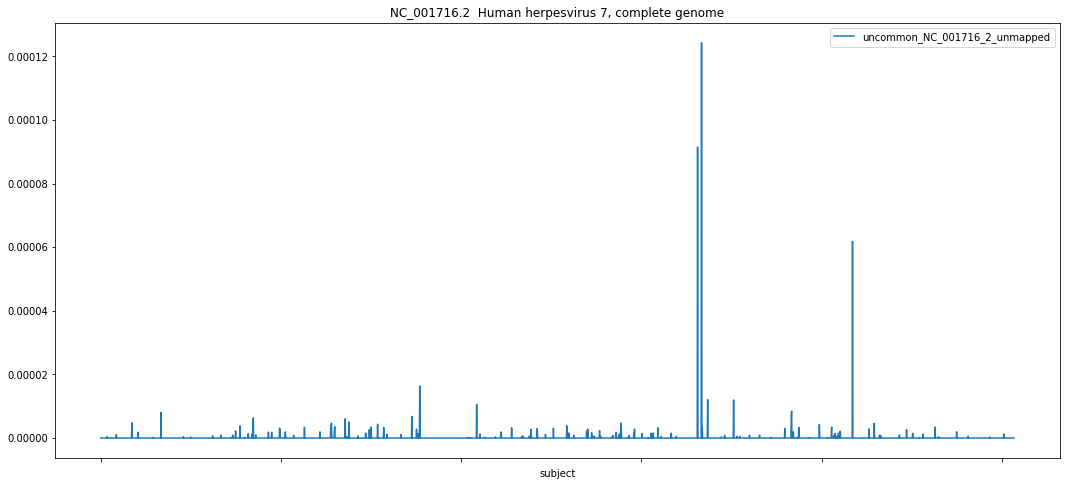

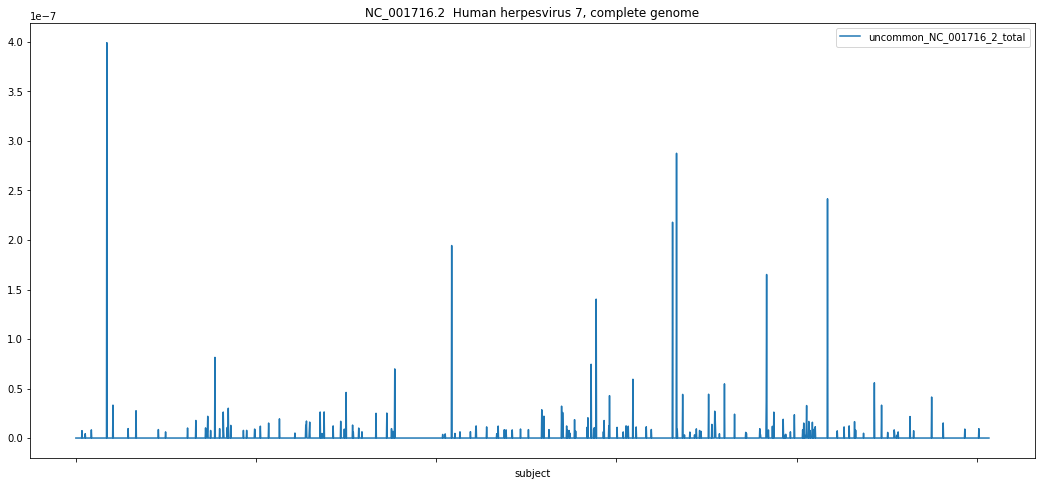

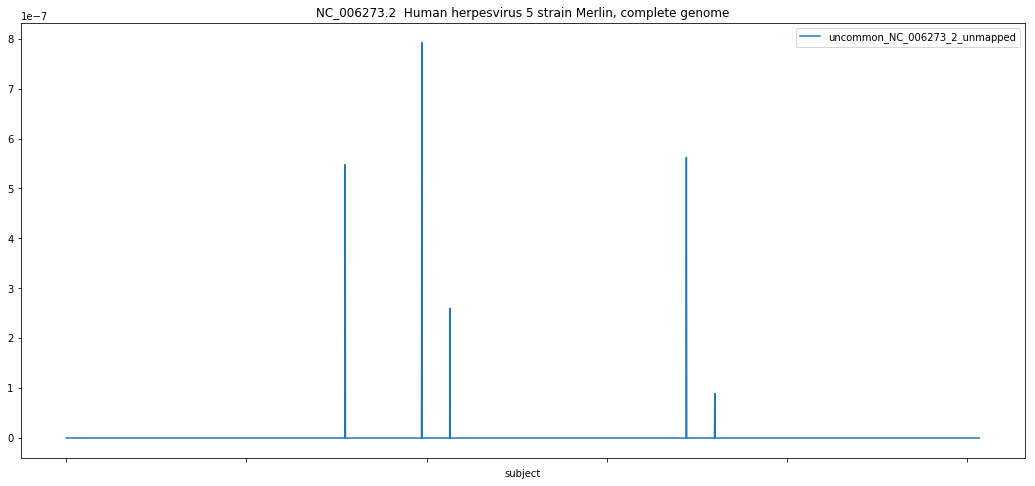

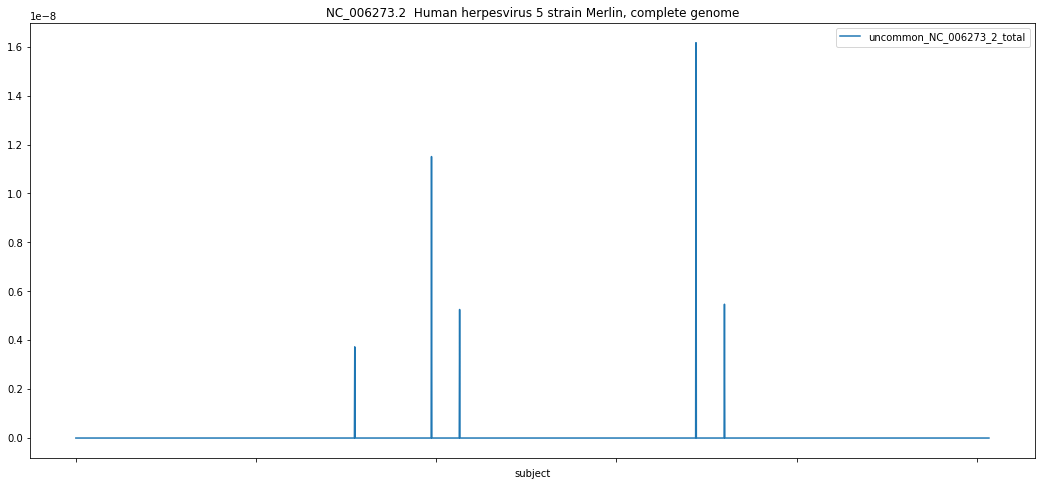

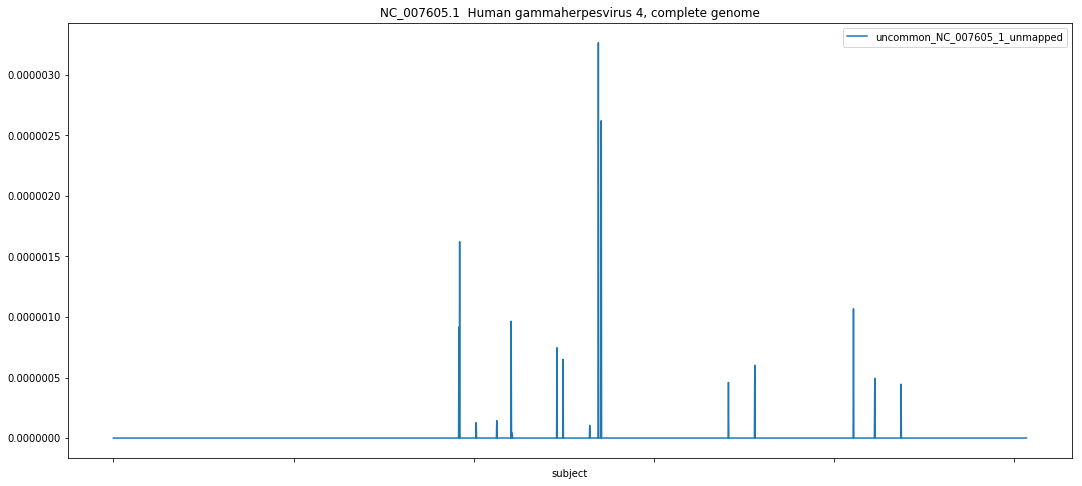

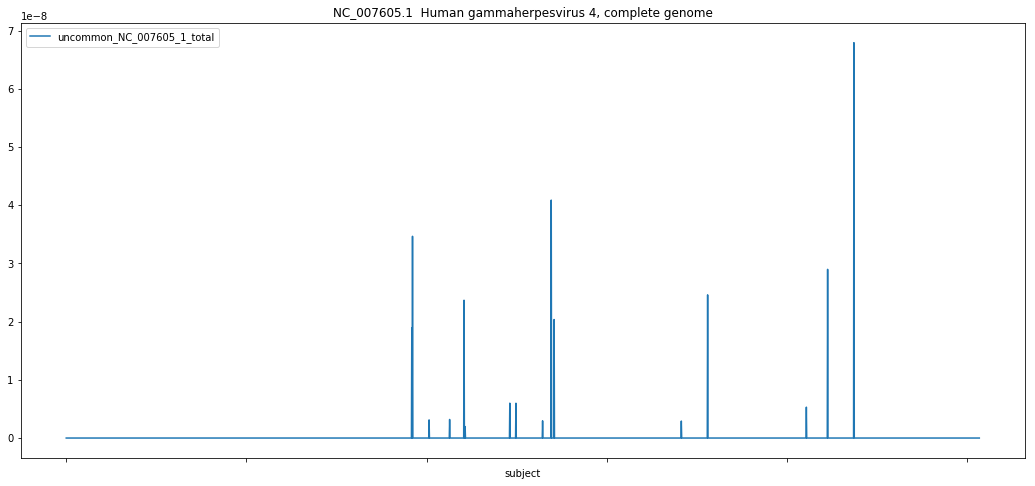

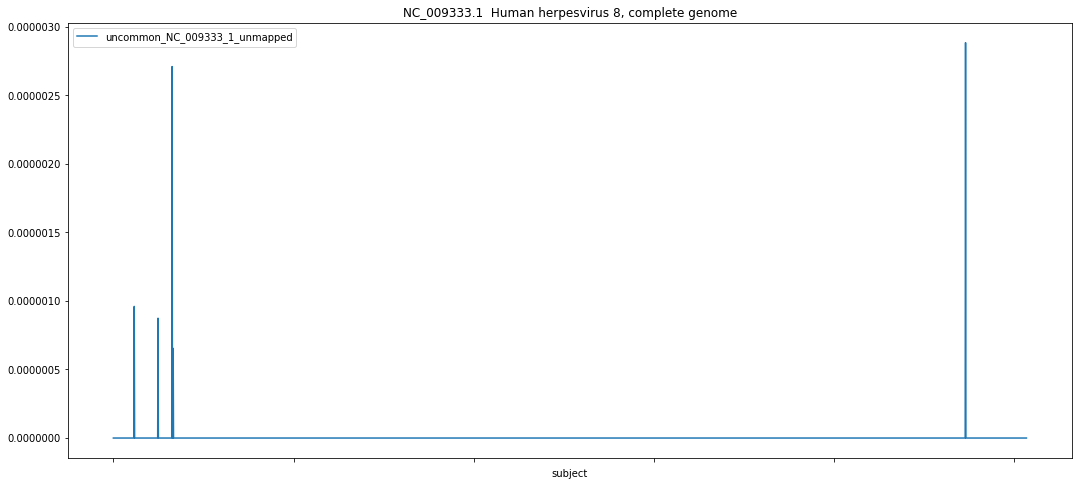

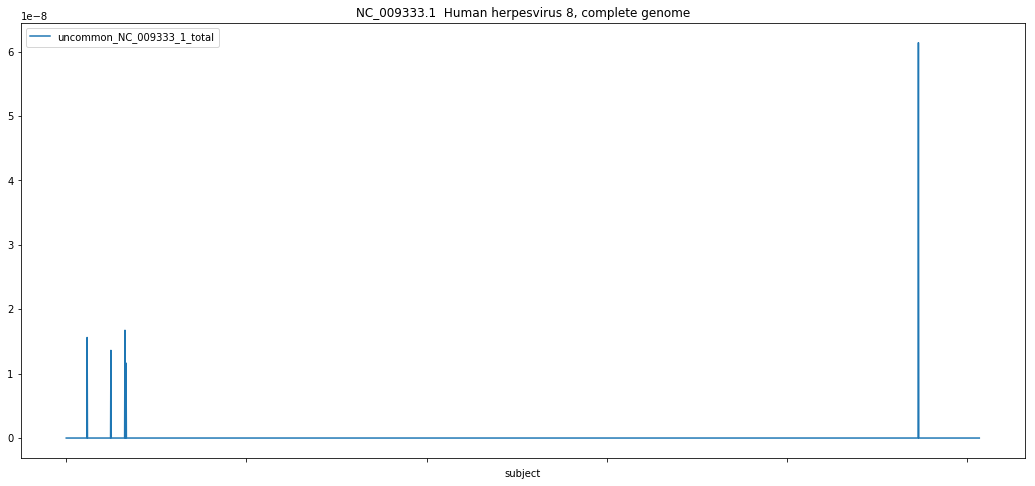

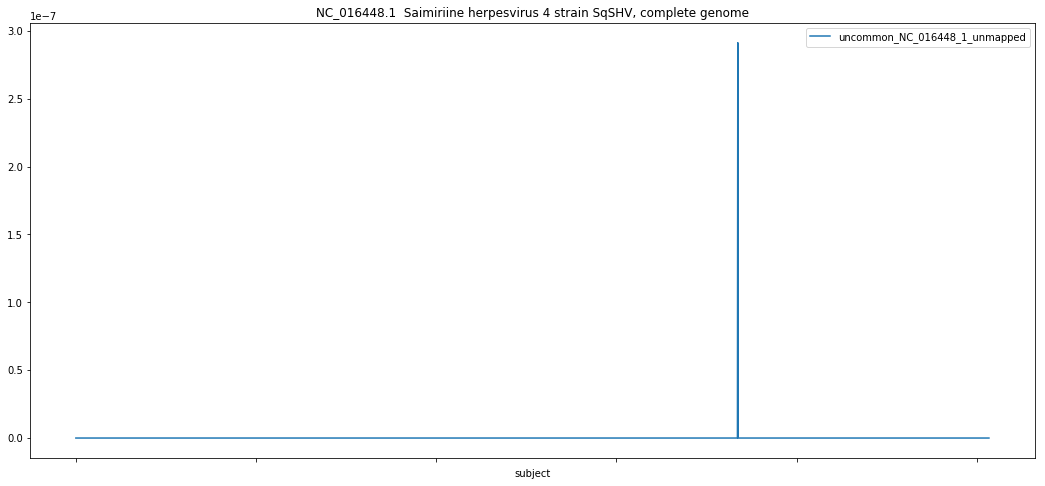

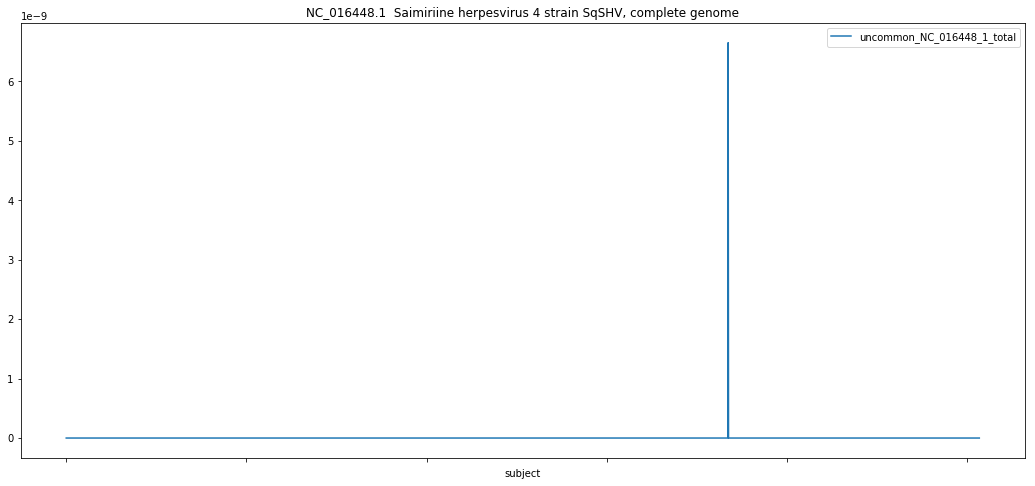

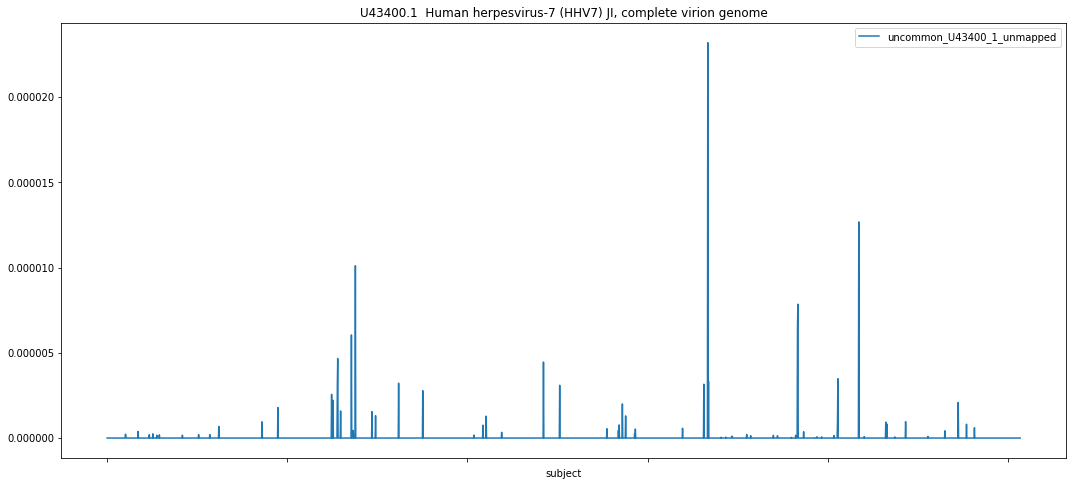

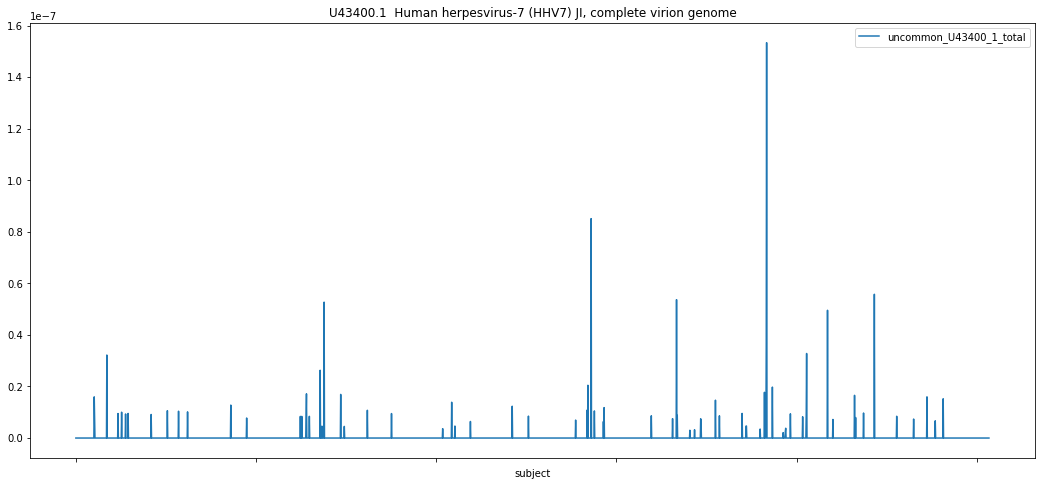

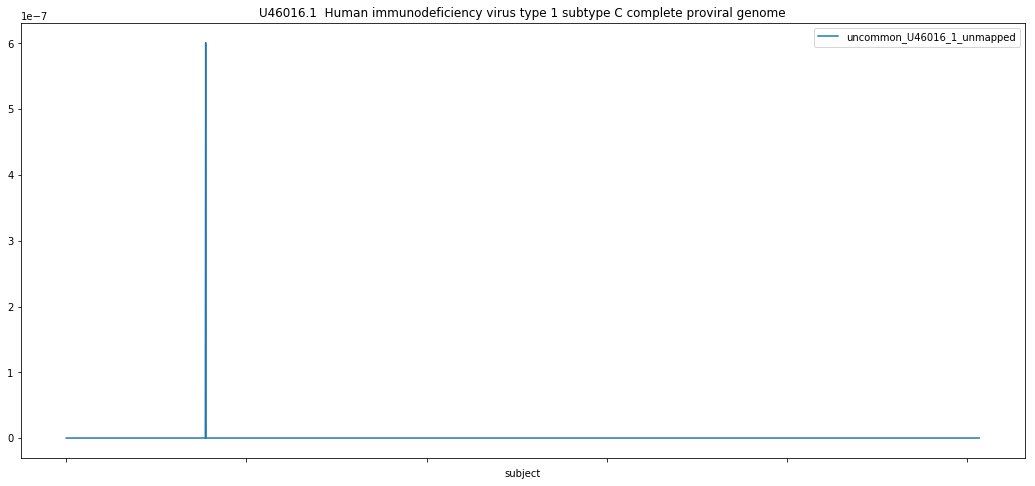

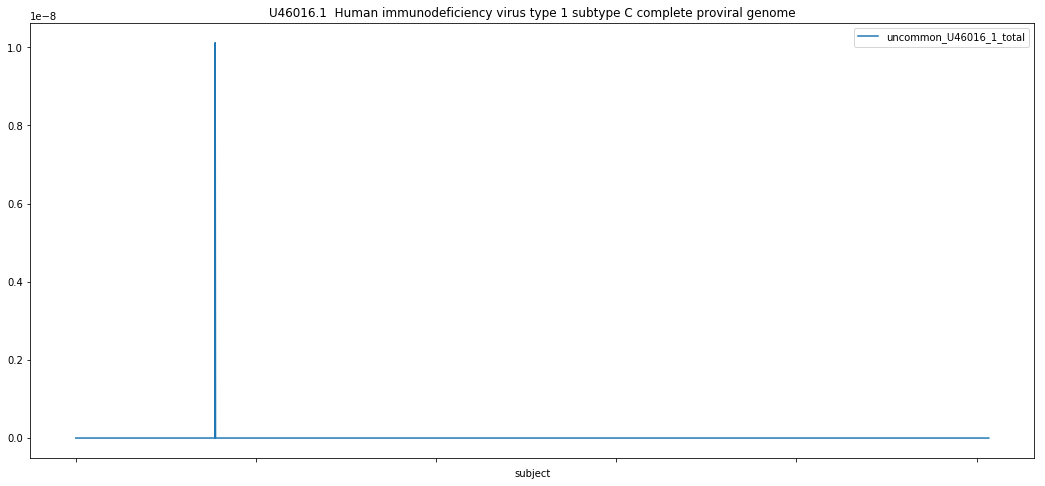

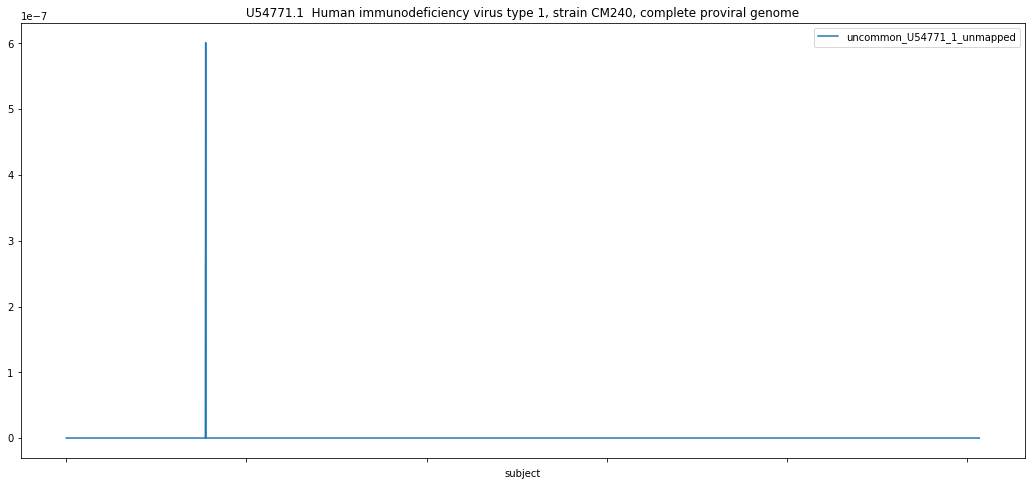

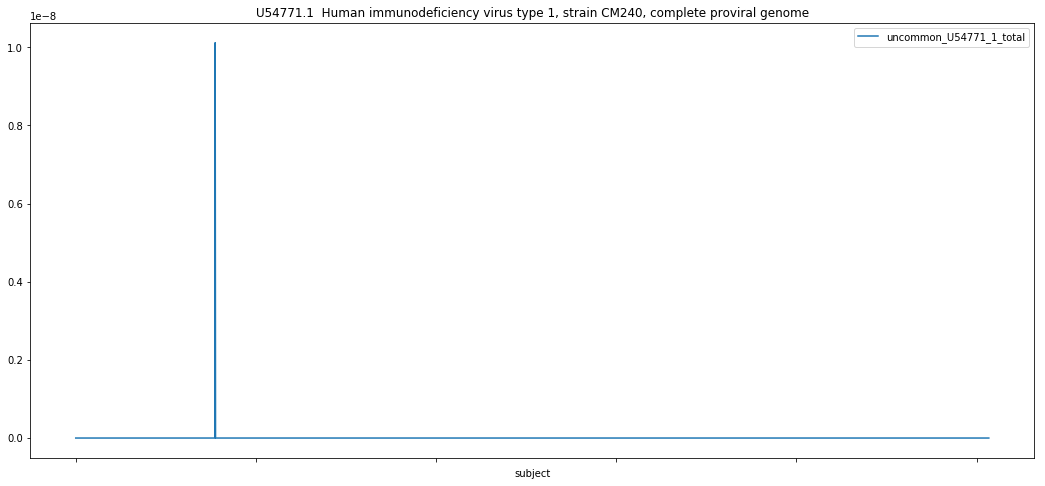

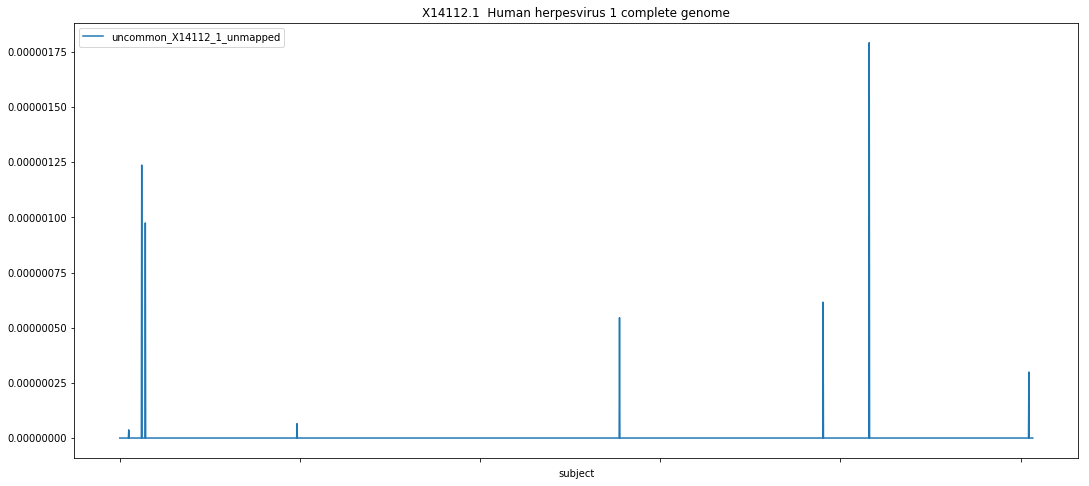

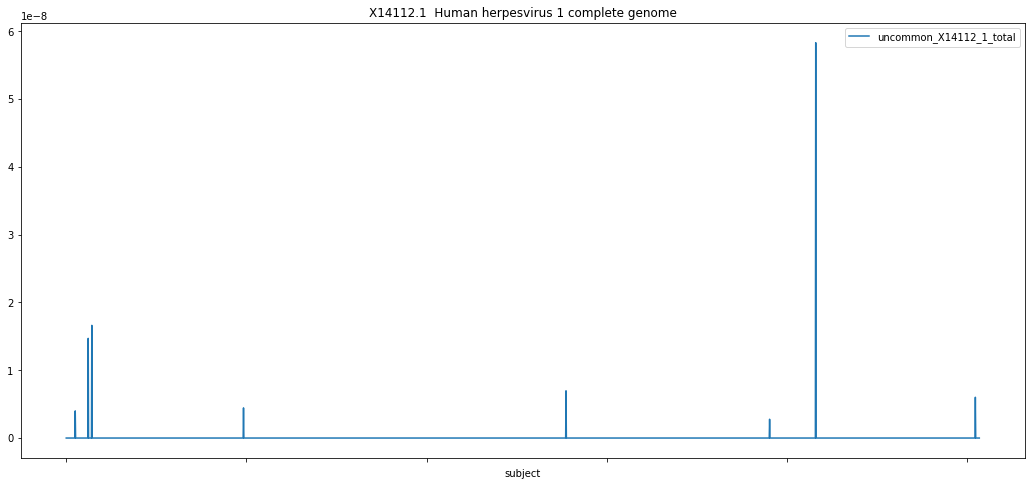

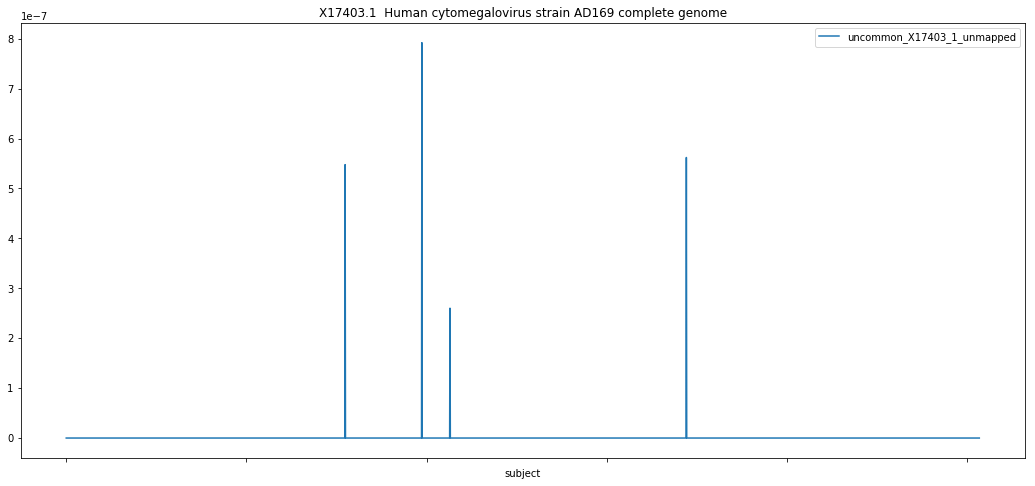

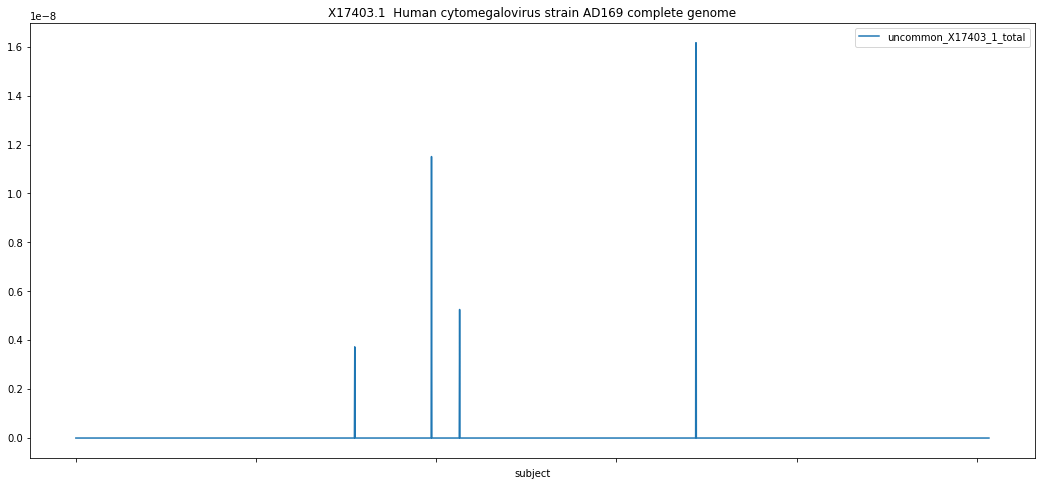

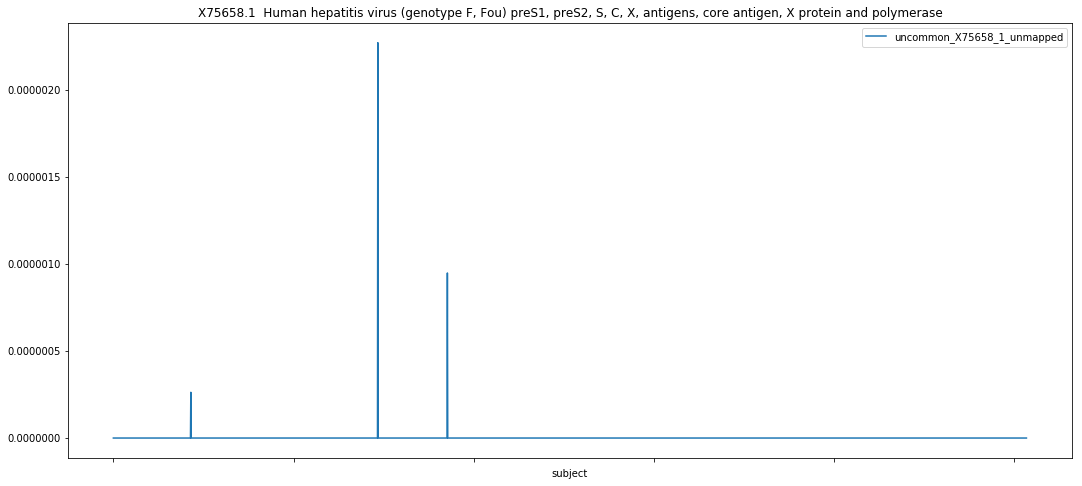

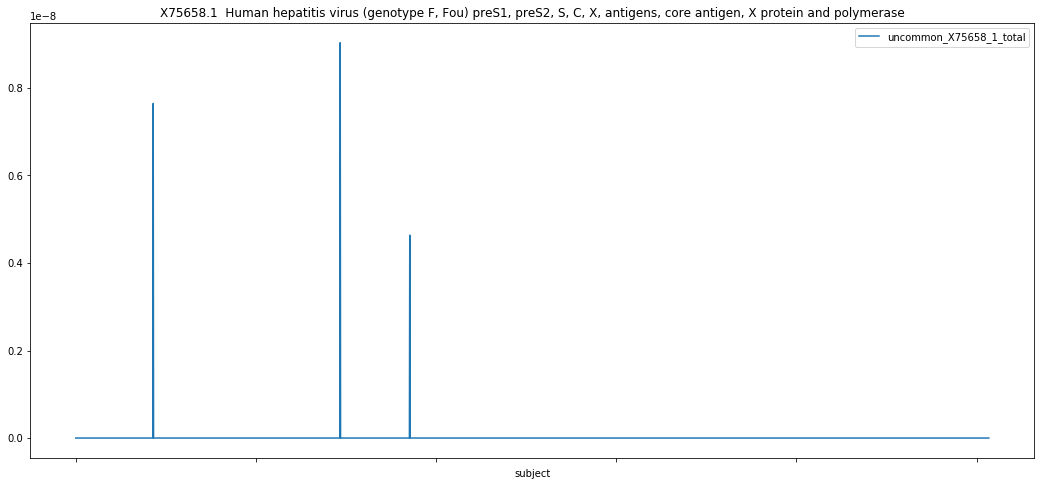

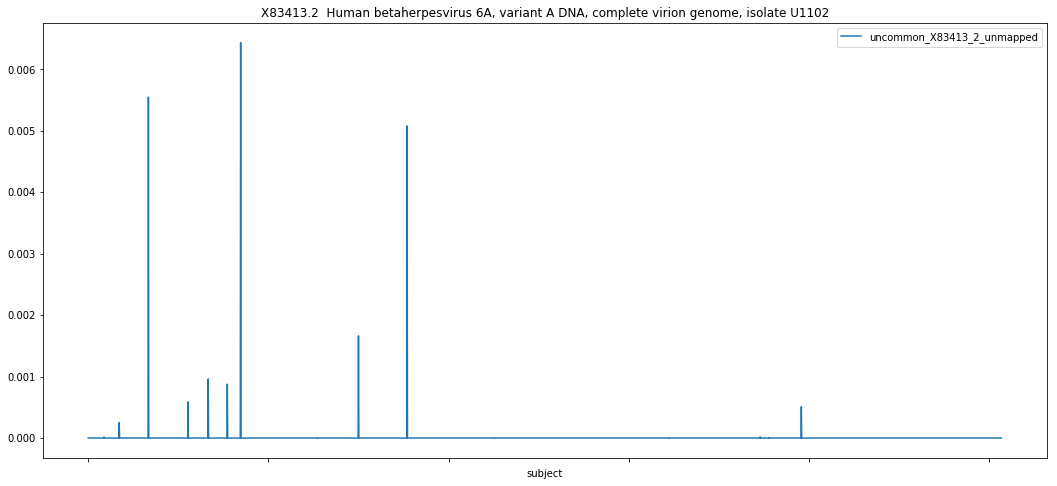

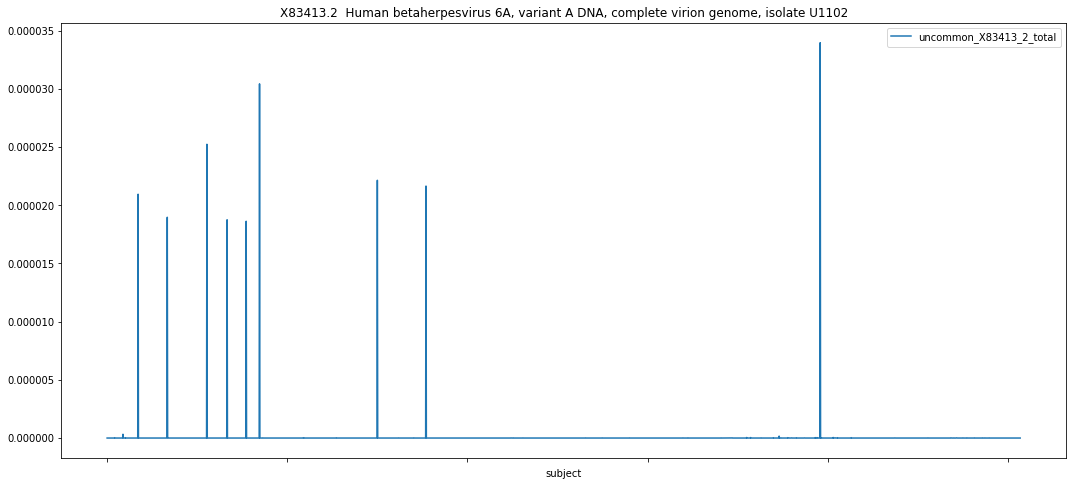

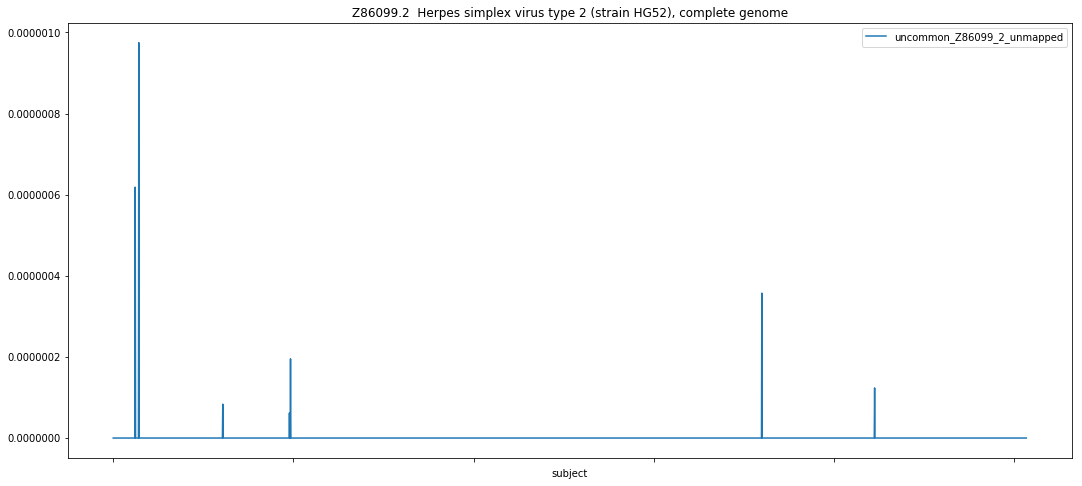

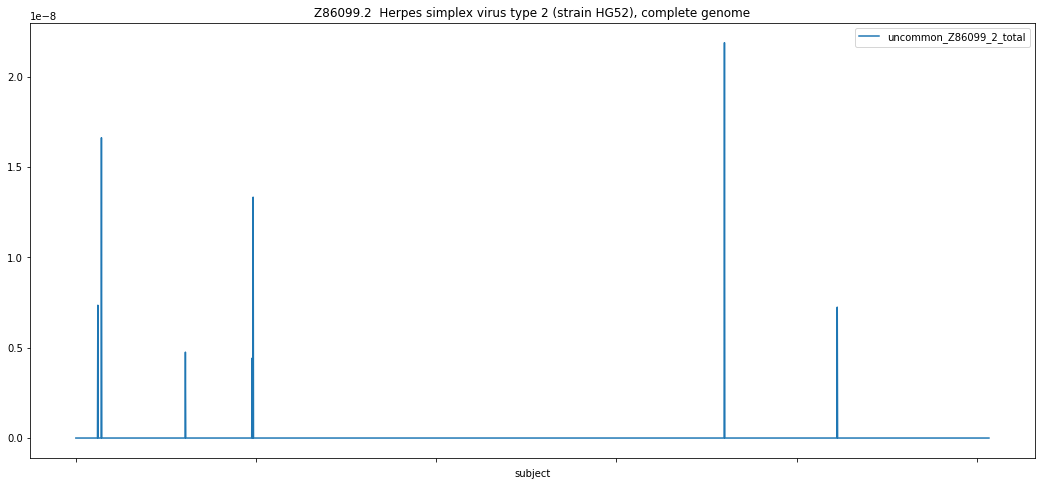

In [7]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['uncommon_'+tmp+'_unmapped'].max() > 0 ):
        #print( tmp )
        df.plot( title=accession + "  " + row['description'],
                    logy=False,x='subject',y='uncommon_'+tmp+'_unmapped')
        df.plot( title=accession + "  " + row['description'],
                    logy=False,x='subject',y='uncommon_'+tmp+'_total')
